## Sales Price estimatation for used cars (Used Car Dataset)

### Objective: 
* Train a model based on existing data to estimate the sales price of used cars for new customers

### **Project Flow**
 * **[Data Dictionary](#Data_Dictionary)**
 * **[Import Required Libraries](#Import_Libraries)**
 * **[Read The Data](#Read_Data)**
 * **[Data Cleaning](#Data_Cleaning)**
 * **[Null Value Treatment](#Null_Value_Treatment)**
 * **[Outlier Treatment](#Outlier_Treatment)**
 * **[Uni-Variate and Bi-Variate Analysis](#Uni_and_bi_Variate)**
 * **[Encoding](#Encoding)**
 * **[OLS Regression (Base Model Build)](#OLS_Regression)**
 * **[Feature Engineering & Feature Selection](#Feature_Engineering)**
 * **[NLP On Decription Column](#NLP)**
 * **[Linear Regression & Penalty](#Linear_Reg)**
 * **[Gradient Descent](#Gradient_Descent)**
 * **[Decision Tree](#Decision_Tree)**
 * **[Random Forest](#Random_Forest)**
 * **[Bagging](#Bagging)**
 * **[KNN Regression](#KNN_Regression)**
 * **[AdaBoost Regression](#AdaBoost)**
 * **[XGBoost](#XGBoost)**
 * **[LigthGBM](#LigthGBM)**
 * **[CatBoost](#CatBoost)**

<a id="Data_Dictionary" ></a>

### Data Dictionary: 
* id (int):               Record id
* region (Object):        Region where the car is being sold
* price (float):          Selling price of the car
* year (Object):          Manufacturing Year of the car
* manufacturer (Object):  Car Manufacturer name
* model (Object):         Car Model name
* condition (Object):     Condition of the used car (like: Excellent, New, Good etc.,)
* cylinders (Object):     Number of cylinders in the engine
* fuel (Object):          Type of fuel used in the car
* odometer (float):       Number of miles driven
* title_status (Object):  Choice of usage (like: Clean, Salvage, Rebuilt etc.,)
* transmission (Object):  Indicates the transmission type (like: Manual, Automatic, others)
* VIN (Object):           VIN Number
* drive (Object):         Indicates the type of drive (like: fwd, rwd, 4wd)
* size (Object):          Indicates the size of the car (like: full-size, mid-size, compact, sub-compact)
* type (Object):          Indicates the vehicle segment (like: SUV, Coupe, Convertible etc.,)
* paint_color (Object):   Car color
* description (Object):   Remarks by the seller on the car condition
* county (Object):        County where car is being sold
* state (Object):         State where car is being sold
* lat (object):           Latitude of the selling place
* long (object):          Longitude of the selling place
* posting_date (DateTime):Car sale posting date

<a id="Import_Libraries" ></a>

### Import required Libraries: 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

from sklearn.impute import KNNImputer

from statsmodels.api import OLS, add_constant

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import r2_score

from xgboost import XGBRegressor

pd.set_option('display.max_columns',26)

<a id="Read_Data" ></a>

### Read The Data: 

In [2]:
df1 = pd.read_csv(r"C:\Users\7mala\Downloads\Capstone\Capstone.csv", parse_dates=['posting_date'],
                  dtype = {'id': float, 'region': object, 'price': float, 'year': object,
                           'manufacturer': object, 'model': object, 
                           'condition': object,'cylinders': object, 'fuel': object, 
                           'odometer': float, 'title_status': object, 
                           'transmission': object, 'VIN': object,'drive': object, 
                           'size': object, 'type': object, 'paint_color': object, 
                           'description': object, 'county': object,'state': object, 
                           'lat': object, 'long': object})

In [3]:
df = df1.head(50000).copy()
df.head()

id                  region    price year manufacturer model  \
0  7.222696e+09                prescott   6000.0  NaN          NaN   NaN   
1  7.218892e+09            fayetteville  11900.0  NaN          NaN   NaN   
2  7.221798e+09            florida keys  21000.0  NaN          NaN   NaN   
3  7.222271e+09  worcester / central MA   1500.0  NaN          NaN   NaN   
4  7.210384e+09              greensboro   4900.0  NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color description county state  lat long posting_date  
0  NaN  NaN         NaN         NaN    NaN    az  NaN  NaN          NaT  
1  NaN  NaN         NaN         NaN    NaN    ar  NaN  NaN          NaT  
2  NaN  NaN         NaN         NaN    NaN    fl  NaN  NaN          NaT  
3  NaN  NaN         NaN         NaN    NaN    ma  NaN  NaN          NaT  
4  NaN  NaN         NaN         NaN    NaN    nc  NaN  NaN          NaT

In [4]:
df.shape

(50000, 23)

In [5]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'county',
       'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            50000 non-null  float64
 1   region        50000 non-null  object 
 2   price         50000 non-null  float64
 3   year          49774 non-null  object 
 4   manufacturer  47796 non-null  object 
 5   model         49256 non-null  object 
 6   condition     30335 non-null  object 
 7   cylinders     30209 non-null  object 
 8   fuel          49794 non-null  object 
 9   odometer      49073 non-null  float64
 10  title_status  48928 non-null  object 
 11  transmission  49802 non-null  object 
 12  VIN           31348 non-null  object 
 13  drive         34378 non-null  object 
 14  size          13270 non-null  object 
 15  type          39366 non-null  object 
 16  paint_color   34387 non-null  object 
 17  description   49970 non-null  object 
 18  county        0 non-null  

In [7]:
df.describe().T

count          mean           std           min           25%  \
id        50000.0  7.311904e+09  4.855475e+06  7.208550e+09  7.308787e+09   
price     50000.0  1.446321e+05  1.581848e+07  0.000000e+00  6.000000e+03   
odometer  49073.0  9.684942e+04  2.823090e+05  0.000000e+00  3.456300e+04   

                   50%           75%           max  
id        7.313513e+09  7.315569e+09  7.316922e+09  
price     1.489200e+04  2.699500e+04  3.009549e+09  
odometer  7.901500e+04  1.260850e+05  1.000000e+07

In [8]:
df.select_dtypes(exclude=np.number).describe().T

count unique                                                top  \
region        50000     53                                    fresno / madera   
year          49774    101                                               2017   
manufacturer  47796     40                                               ford   
model         49256   8303                                              f-150   
condition     30335      6                                          excellent   
cylinders     30209      8                                        6 cylinders   
fuel          49794      5                                                gas   
title_status  48928      6                                              clean   
transmission  49802      3                                          automatic   
VIN           31348  17976                                  5B4KPD27X83433783   
drive         34378      3                                                fwd   
size          13270      4                                          full-size   
type          39366     13                                              sedan   
paint_color   34387     12                                              white   
description   49970  42037  Frontier Auto Sales We accept trades! (tow it,...   
county            0      0                                                NaN   
state         50000     14                                                 ca   
lat           49852   6448                                          33.779214   
long          49852   6504                                         -84.411811   
posting_date  49971  47295                          2021-05-03 20:46:03-07:00   

               freq  
region         2983  
year           4623  
manufacturer   7902  
model           780  
condition     13478  
cylinders     10769  
fuel          40920  
title_status  47436  
transmission  39342  
VIN              37  
drive         13242  
size           7303  
type          10883  
paint_color   10838  
description      46  
county          NaN  
state         28829  
lat            1015  
long           1015  
posting_date      8

<a id="Data_Cleaning" ></a>

### Data Cleaning: 

1. Find unique values in each category and correct mis-spelled or incorrect sub-categories
2. Drop columns which doesnt hold significance to the target variable

In [9]:
for i in df.select_dtypes(exclude=np.number).drop(['description', 'VIN', 'lat', 'long', 'posting_date'], axis=1).columns:
    print(i)
    print(df[i].unique())
    print('\n')

region
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe']


year
[nan '2014' '2010' '2020' '2017' '2013' '2012' '2016' '2019' '2011' '1992'
 '2018' '2004' '2015' '2001' '2006' '1968' '2003' '2008' '2007' '2005'
 '1966' '2009' '1998' '2002' '1999' '2021' '1997' '197

In [10]:
df.drop(['id', 'VIN', 'county'], axis=1, inplace=True)

In [11]:
df.head()

region    price year manufacturer model condition  \
0                prescott   6000.0  NaN          NaN   NaN       NaN   
1            fayetteville  11900.0  NaN          NaN   NaN       NaN   
2            florida keys  21000.0  NaN          NaN   NaN       NaN   
3  worcester / central MA   1500.0  NaN          NaN   NaN       NaN   
4              greensboro   4900.0  NaN          NaN   NaN       NaN   

  cylinders fuel  odometer title_status transmission drive size type  \
0       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
1       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
2       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
3       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   
4       NaN  NaN       NaN          NaN          NaN   NaN  NaN  NaN   

  paint_color description state  lat long posting_date  
0         NaN         NaN    az  NaN  NaN          NaT  
1         NaN         NaN    ar  NaN  NaN          NaT  
2         NaN         NaN    fl  NaN  NaN          NaT  
3         NaN         NaN    ma  NaN  NaN          NaT  
4         NaN         NaN    nc  NaN  NaN          NaT

<a id="Null_Value_Treatment" ></a>

### Null Value Treatment: 

1. Identify null values in each column
2. Drop columns if null values are more than 70% (Becuase such columns induces more bias into the data)
3. Drop records having more than 5 null values
4. Impute int columns using KNN imputer
5. 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        50000 non-null  object 
 1   price         50000 non-null  float64
 2   year          49774 non-null  object 
 3   manufacturer  47796 non-null  object 
 4   model         49256 non-null  object 
 5   condition     30335 non-null  object 
 6   cylinders     30209 non-null  object 
 7   fuel          49794 non-null  object 
 8   odometer      49073 non-null  float64
 9   title_status  48928 non-null  object 
 10  transmission  49802 non-null  object 
 11  drive         34378 non-null  object 
 12  size          13270 non-null  object 
 13  type          39366 non-null  object 
 14  paint_color   34387 non-null  object 
 15  description   49970 non-null  object 
 16  state         50000 non-null  object 
 17  lat           49852 non-null  object 
 18  long          49852 non-nu

In [13]:
df.isnull().sum()/df.shape[0]*100

region           0.000
price            0.000
year             0.452
manufacturer     4.408
model            1.488
condition       39.330
cylinders       39.582
fuel             0.412
odometer         1.854
title_status     2.144
transmission     0.396
drive           31.244
size            73.460
type            21.268
paint_color     31.226
description      0.060
state            0.000
lat              0.296
long             0.296
posting_date     0.058
dtype: float64

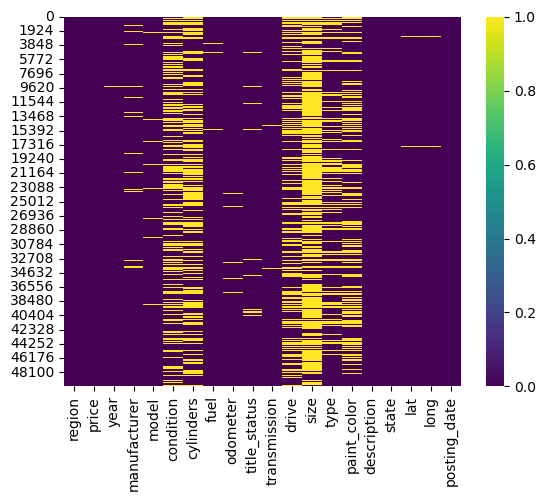

In [14]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

In [15]:
df.drop('size', axis=1, inplace=True)
df

region    price  year manufacturer  \
0                    prescott   6000.0   NaN          NaN   
1                fayetteville  11900.0   NaN          NaN   
2                florida keys  21000.0   NaN          NaN   
3      worcester / central MA   1500.0   NaN          NaN   
4                  greensboro   4900.0   NaN          NaN   
...                       ...      ...   ...          ...   
49995            reno / tahoe  15990.0  2017       nissan   
49996            reno / tahoe  16990.0  2012         audi   
49997            reno / tahoe      0.0  2020         jeep   
49998            reno / tahoe  18990.0  2013          bmw   
49999            reno / tahoe   9000.0  2010       subaru   

                      model  condition    cylinders   fuel  odometer  \
0                       NaN        NaN          NaN    NaN       NaN   
1                       NaN        NaN          NaN    NaN       NaN   
2                       NaN        NaN          NaN    NaN       NaN   
3                       NaN        NaN          NaN    NaN       NaN   
4                       NaN        NaN          NaN    NaN       NaN   
...                     ...        ...          ...    ...       ...   
49995         altima 2.5 sv  excellent  4 cylinders    gas   62029.0   
49996  q5 3.2l premium plus  excellent  6 cylinders    gas   71945.0   
49997              wrangler        NaN          NaN  other    5553.0   
49998  x5 xdrive35i premium  excellent  6 cylinders    gas   78378.0   
49999               outback       good  4 cylinders    gas  131088.0   

      title_status transmission drive   type paint_color  \
0              NaN          NaN   NaN    NaN         NaN   
1              NaN          NaN   NaN    NaN         NaN   
2              NaN          NaN   NaN    NaN         NaN   
3              NaN          NaN   NaN    NaN         NaN   
4              NaN          NaN   NaN    NaN         NaN   
...            ...          ...   ...    ...         ...   
49995        clean    automatic   NaN  sedan         NaN   
49996        clean    automatic   4wd    SUV         NaN   
49997        clean    automatic   4wd    SUV        blue   
49998        clean    automatic   4wd    SUV         NaN   
49999        clean    automatic   4wd    NaN        grey   

                                             description state        lat  \
0                                                    NaN    az        NaN   
1                                                    NaN    ar        NaN   
2                                                    NaN    fl        NaN   
3                                                    NaN    ma        NaN   
4                                                    NaN    nc        NaN   
...                                                  ...   ...        ...   
49995  2017 Nissan Altima 2.5 SV Sedan 62,029 $255/mo...    ca  39.495568   
49996  2012 Audi Q5 3.2L Premium Plus SUV 71,945 $272...    ca  39.495568   
49997  2020 Jeep Wrangler Unlimited Willys     Offere...    ca   39.49115   
49998  2013 BMW X5 xDrive35i Premium xDrive35i Premiu...    ca  39.495568   
49999  2010 Subaru Outback Pzev 131,000 miles $9,000 ...    ca    39.4972   

              long               posting_date  
0              NaN                        NaT  
1              NaN                        NaT  
2              NaN                        NaT  
3              NaN                        NaT  
4              NaN                        NaT  
...            ...                        ...  
49995  -119.789546  2021-04-26 17:30:35-07:00  
49996  -119.789546  2021-04-26 17:20:01-07:00  
49997  -119.790321  2021-04-26 17:13:40-07:00  
49998  -119.789546  2021-04-26 17:00:21-07:00  
49999    -119.7764  2021-04-26 16:44:20-07:00  

[50000 rows x 19 columns]

In [16]:
df = df[df.isnull().sum(axis=1)<=5].reset_index(drop=True)
df

region    price  year manufacturer                     model  \
0            auburn  33590.0  2014          gmc  sierra 1500 crew cab slt   
1            auburn  22590.0  2010    chevrolet            silverado 1500   
2            auburn  39590.0  2020    chevrolet       silverado 1500 crew   
3            auburn  30990.0  2017       toyota      tundra double cab sr   
4            auburn  15000.0  2013         ford                 f-150 xlt   
...             ...      ...   ...          ...                       ...   
49341  reno / tahoe  15990.0  2017       nissan             altima 2.5 sv   
49342  reno / tahoe  16990.0  2012         audi      q5 3.2l premium plus   
49343  reno / tahoe      0.0  2020         jeep                  wrangler   
49344  reno / tahoe  18990.0  2013          bmw      x5 xdrive35i premium   
49345  reno / tahoe   9000.0  2010       subaru                   outback   

       condition    cylinders   fuel  odometer title_status transmission  \
0           good  8 cylinders    gas   57923.0        clean        other   
1           good  8 cylinders    gas   71229.0        clean        other   
2           good  8 cylinders    gas   19160.0        clean        other   
3           good  8 cylinders    gas   41124.0        clean        other   
4      excellent  6 cylinders    gas  128000.0        clean    automatic   
...          ...          ...    ...       ...          ...          ...   
49341  excellent  4 cylinders    gas   62029.0        clean    automatic   
49342  excellent  6 cylinders    gas   71945.0        clean    automatic   
49343        NaN          NaN  other    5553.0        clean    automatic   
49344  excellent  6 cylinders    gas   78378.0        clean    automatic   
49345       good  4 cylinders    gas  131088.0        clean    automatic   

      drive    type paint_color  \
0       NaN  pickup       white   
1       NaN  pickup        blue   
2       NaN  pickup         red   
3       NaN  pickup         red   
4       rwd   truck       black   
...     ...     ...         ...   
49341   NaN   sedan         NaN   
49342   4wd     SUV         NaN   
49343   4wd     SUV        blue   
49344   4wd     SUV         NaN   
49345   4wd     NaN        grey   

                                             description state        lat  \
0      Carvana is the safer way to buy a car During t...    al      32.59   
1      Carvana is the safer way to buy a car During t...    al      32.59   
2      Carvana is the safer way to buy a car During t...    al      32.59   
3      Carvana is the safer way to buy a car During t...    al      32.59   
4      2013 F-150 XLT V6 4 Door. Good condition. Leve...    al     32.592   
...                                                  ...   ...        ...   
49341  2017 Nissan Altima 2.5 SV Sedan 62,029 $255/mo...    ca  39.495568   
49342  2012 Audi Q5 3.2L Premium Plus SUV 71,945 $272...    ca  39.495568   
49343  2020 Jeep Wrangler Unlimited Willys     Offere...    ca   39.49115   
49344  2013 BMW X5 xDrive35i Premium xDrive35i Premiu...    ca  39.495568   
49345  2010 Subaru Outback Pzev 131,000 miles $9,000 ...    ca    39.4972   

              long               posting_date  
0           -85.48  2021-05-04 12:31:18-05:00  
1           -85.48  2021-05-04 12:31:08-05:00  
2           -85.48  2021-05-04 12:31:25-05:00  
3           -85.48  2021-05-04 10:41:31-05:00  
4         -85.5189  2021-05-03 14:02:03-05:00  
...            ...                        ...  
49341  -119.789546  2021-04-26 17:30:35-07:00  
49342  -119.789546  2021-04-26 17:20:01-07:00  
49343  -119.790321  2021-04-26 17:13:40-07:00  
49344  -119.789546  2021-04-26 17:00:21-07:00  
49345    -119.7764  2021-04-26 16:44:20-07:00  

[49346 rows x 19 columns]

In [17]:
knn_impute = KNNImputer(n_neighbors=3)

In [18]:
df_num = pd.DataFrame(knn_impute.fit_transform(df.select_dtypes(include=np.number)), columns=['price', 'odometer'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49346 entries, 0 to 49345
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     49346 non-null  float64
 1   odometer  49346 non-null  float64
dtypes: float64(2)
memory usage: 771.2 KB


In [19]:
df_1 = df.copy()

In [20]:
df_1['odometer'] = df_num['odometer']

In [21]:
df_1 = df_1.fillna(method='bfill')

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49346 entries, 0 to 49345
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        49346 non-null  object 
 1   price         49346 non-null  float64
 2   year          49346 non-null  object 
 3   manufacturer  49346 non-null  object 
 4   model         49346 non-null  object 
 5   condition     49346 non-null  object 
 6   cylinders     49346 non-null  object 
 7   fuel          49346 non-null  object 
 8   odometer      49346 non-null  float64
 9   title_status  49346 non-null  object 
 10  transmission  49346 non-null  object 
 11  drive         49346 non-null  object 
 12  type          49345 non-null  object 
 13  paint_color   49346 non-null  object 
 14  description   49346 non-null  object 
 15  state         49346 non-null  object 
 16  lat           49346 non-null  object 
 17  long          49346 non-null  object 
 18  posting_date  49346 non-nu

In [23]:
df_1.dropna(axis=0, inplace=True)

In [24]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49345 entries, 0 to 49344
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        49345 non-null  object 
 1   price         49345 non-null  float64
 2   year          49345 non-null  object 
 3   manufacturer  49345 non-null  object 
 4   model         49345 non-null  object 
 5   condition     49345 non-null  object 
 6   cylinders     49345 non-null  object 
 7   fuel          49345 non-null  object 
 8   odometer      49345 non-null  float64
 9   title_status  49345 non-null  object 
 10  transmission  49345 non-null  object 
 11  drive         49345 non-null  object 
 12  type          49345 non-null  object 
 13  paint_color   49345 non-null  object 
 14  description   49345 non-null  object 
 15  state         49345 non-null  object 
 16  lat           49345 non-null  object 
 17  long          49345 non-null  object 
 18  posting_date  49345 non-null  o

<a id="Outlier_Treatment" ></a>

### Outlier Treatment : 

1. We cannot ignore outliers for price variable, since vehicles with higher prices bring more revenue and profits to the company.
2. Assuming there is 10% profit on selling price, we consider vehicles only which has a profit of minimum 50 USD (implies selling price = 500 USD).
3. We can remove right outliers from odometer variable, since we rarely get vehicles that have been driven for exceptionally long distance.
4. We dont want to remove left outliers for odometer variable since price & profits by selling almost new vehicle will be high and the vehicles will be fast selling.

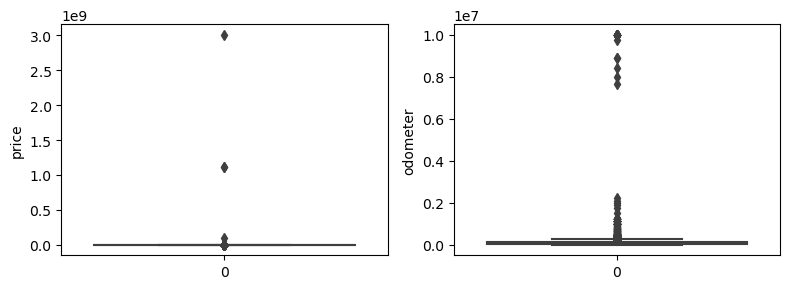

In [25]:
t=1
plt.figure(figsize=(8,3))
for i in ['price', 'odometer']:
    plt.subplot(1,2,t)
    sns.boxplot(df_1[i])
    plt.ylabel(i)
    t=t+1
plt.tight_layout()

In [26]:
df_2 = df_1[df_1.price>500]

* Assuming 10% profit, so we shall consider only which has a profit of bare minimum 50 USD (implies selling price = 500 USD)

In [27]:
df_1.shape

(49345, 19)

In [28]:
df_2.shape

(43490, 19)

In [29]:
df_2.head()

region    price  year manufacturer                     model  condition  \
0  auburn  33590.0  2014          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590.0  2010    chevrolet            silverado 1500       good   
2  auburn  39590.0  2020    chevrolet       silverado 1500 crew       good   
3  auburn  30990.0  2017       toyota      tundra double cab sr       good   
4  auburn  15000.0  2013         ford                 f-150 xlt  excellent   

     cylinders fuel  odometer title_status transmission drive    type  \
0  8 cylinders  gas   57923.0        clean        other   rwd  pickup   
1  8 cylinders  gas   71229.0        clean        other   rwd  pickup   
2  8 cylinders  gas   19160.0        clean        other   rwd  pickup   
3  8 cylinders  gas   41124.0        clean        other   rwd  pickup   
4  6 cylinders  gas  128000.0        clean    automatic   rwd   truck   

  paint_color                                        description state  \
0       white  Carvana is the safer way to buy a car During t...    al   
1        blue  Carvana is the safer way to buy a car During t...    al   
2         red  Carvana is the safer way to buy a car During t...    al   
3         red  Carvana is the safer way to buy a car During t...    al   
4       black  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al   

      lat      long               posting_date  
0   32.59    -85.48  2021-05-04 12:31:18-05:00  
1   32.59    -85.48  2021-05-04 12:31:08-05:00  
2   32.59    -85.48  2021-05-04 12:31:25-05:00  
3   32.59    -85.48  2021-05-04 10:41:31-05:00  
4  32.592  -85.5189  2021-05-03 14:02:03-05:00

q1 = df_1.select_dtypes(include=np.number).quantile(0.25)
q3 = df_1.select_dtypes(include=np.number).quantile(0.75)
iqr = q3-q1
ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr
df_3 = df_1[~((df_1.select_dtypes(include=np.number)<ll)|(df_1.select_dtypes(include=np.number)>ul)).any(axis=1)]

In [30]:
df_3 = df_2[df_2['odometer']<200000]

In [31]:
df_3.shape

(40921, 19)

In [32]:
df_2.shape

(43490, 19)

In [33]:
df_1.shape

(49345, 19)

In [34]:
df_3.head()

region    price  year manufacturer                     model  condition  \
0  auburn  33590.0  2014          gmc  sierra 1500 crew cab slt       good   
1  auburn  22590.0  2010    chevrolet            silverado 1500       good   
2  auburn  39590.0  2020    chevrolet       silverado 1500 crew       good   
3  auburn  30990.0  2017       toyota      tundra double cab sr       good   
4  auburn  15000.0  2013         ford                 f-150 xlt  excellent   

     cylinders fuel  odometer title_status transmission drive    type  \
0  8 cylinders  gas   57923.0        clean        other   rwd  pickup   
1  8 cylinders  gas   71229.0        clean        other   rwd  pickup   
2  8 cylinders  gas   19160.0        clean        other   rwd  pickup   
3  8 cylinders  gas   41124.0        clean        other   rwd  pickup   
4  6 cylinders  gas  128000.0        clean    automatic   rwd   truck   

  paint_color                                        description state  \
0       white  Carvana is the safer way to buy a car During t...    al   
1        blue  Carvana is the safer way to buy a car During t...    al   
2         red  Carvana is the safer way to buy a car During t...    al   
3         red  Carvana is the safer way to buy a car During t...    al   
4       black  2013 F-150 XLT V6 4 Door. Good condition. Leve...    al   

      lat      long               posting_date  
0   32.59    -85.48  2021-05-04 12:31:18-05:00  
1   32.59    -85.48  2021-05-04 12:31:08-05:00  
2   32.59    -85.48  2021-05-04 12:31:25-05:00  
3   32.59    -85.48  2021-05-04 10:41:31-05:00  
4  32.592  -85.5189  2021-05-03 14:02:03-05:00

* We can remove outliers from odometer variable, since we rarely get vehicles that have been driven for exceptionally long distance.
* But we cannot ignore outliers for price variable, since vehicles with higher prices bring more revenue and profits
* For the sake of parameter influence we shall remove outliers (df_3) for basic model building
* Rebuild the model including outliers of price (df_2) and improve the efficiency

<a id="Uni_and_bi_Variate" ></a>

### Uni-Variate and Bi-Variate Analysis : 

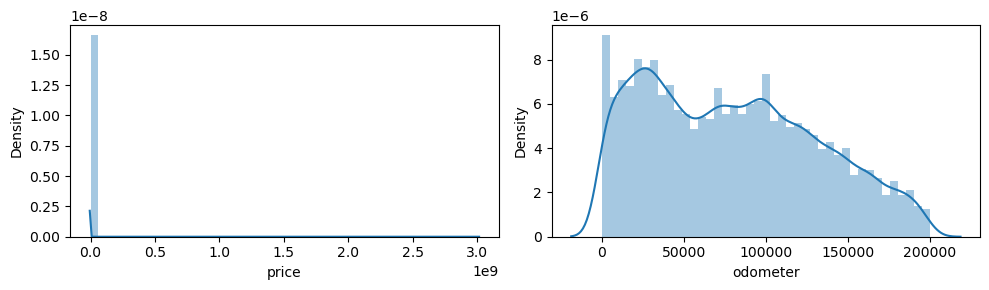

In [35]:
t=1
plt.figure(figsize=(10,3))
for i in ['price', 'odometer']:
    plt.subplot(1,2,t)
    sns.distplot(df_3[i])
    t=t+1
plt.tight_layout()

In [36]:
df_3.select_dtypes(exclude=np.number).columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [37]:
cat_cols = ['year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'state']

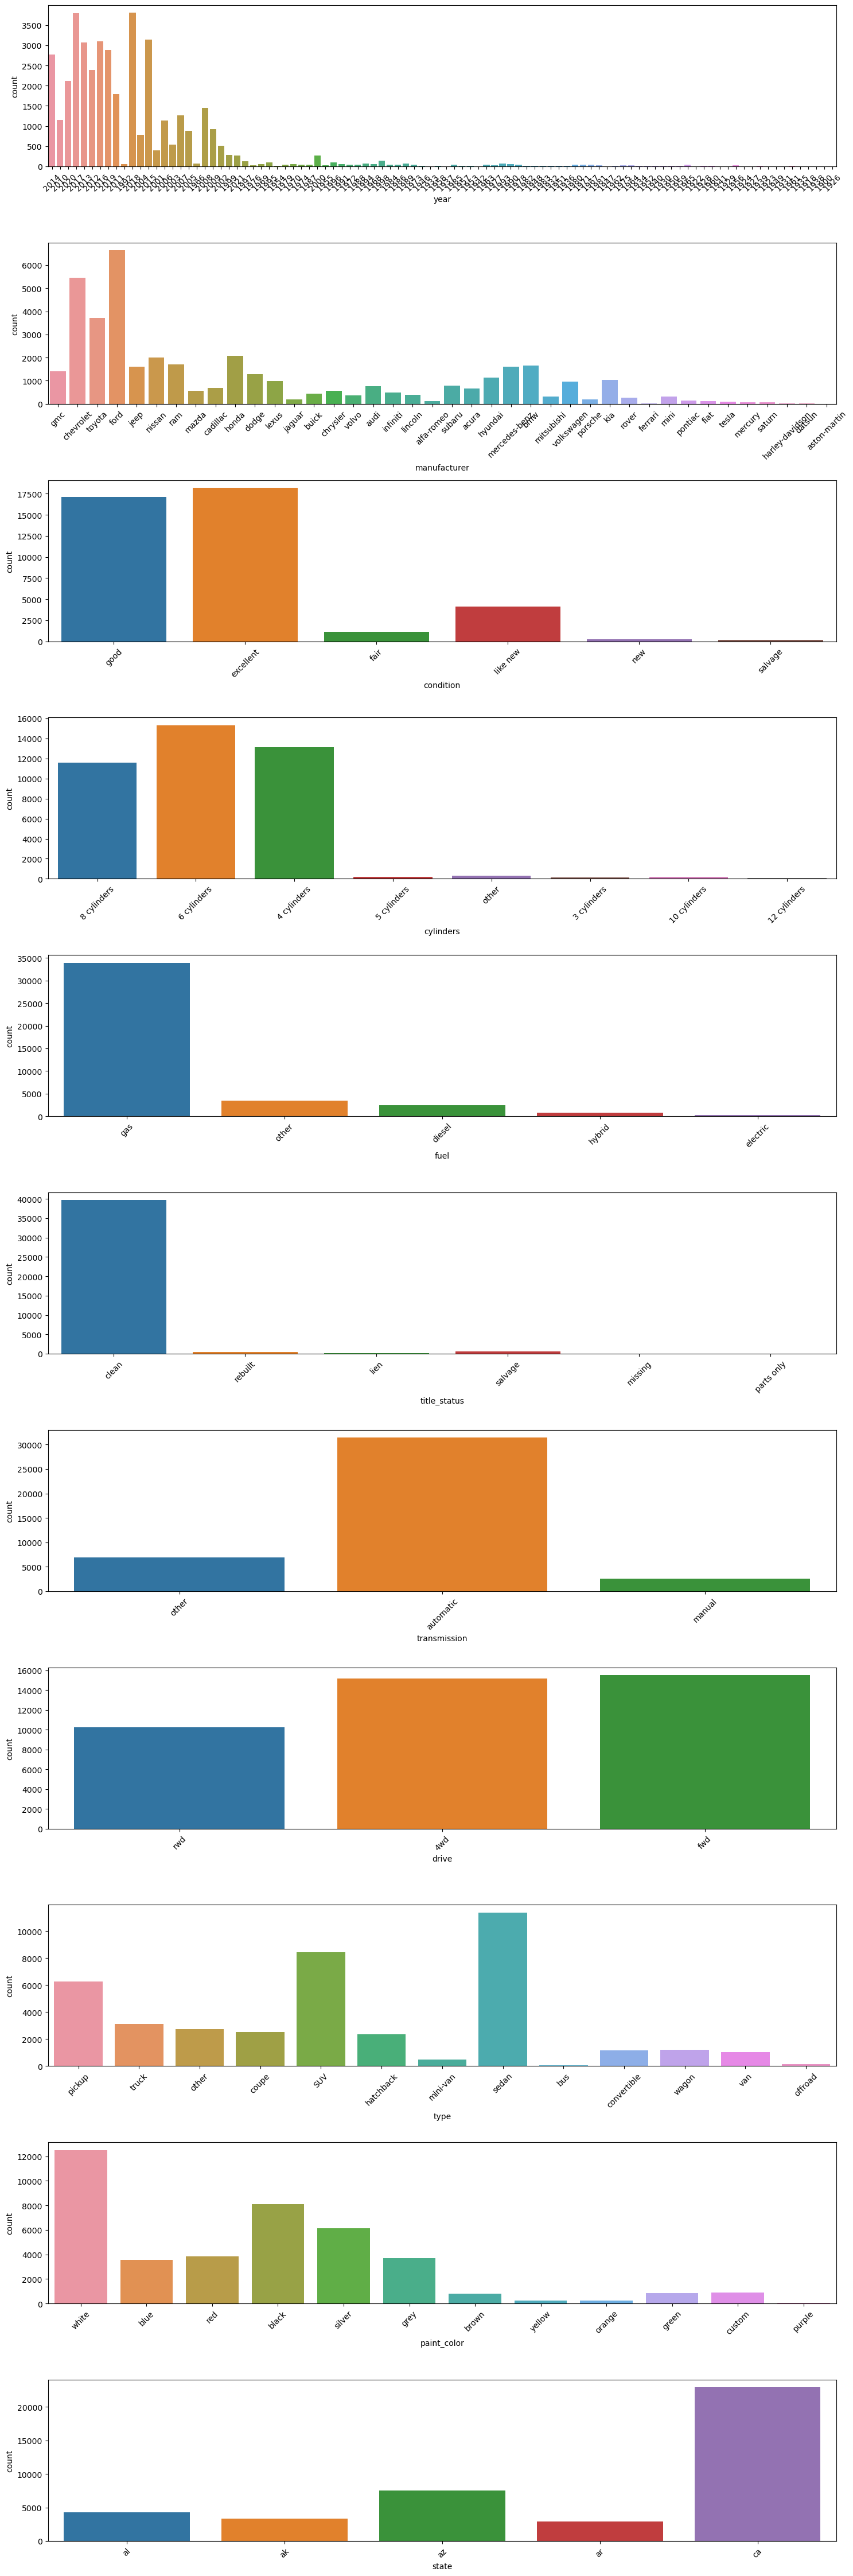

In [38]:
t=1
plt.figure(figsize=(15,45))
for i in cat_cols:
    plt.subplot(11,1,t)
    sns.countplot(x=i, data=df_3)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    t=t+1
plt.tight_layout()

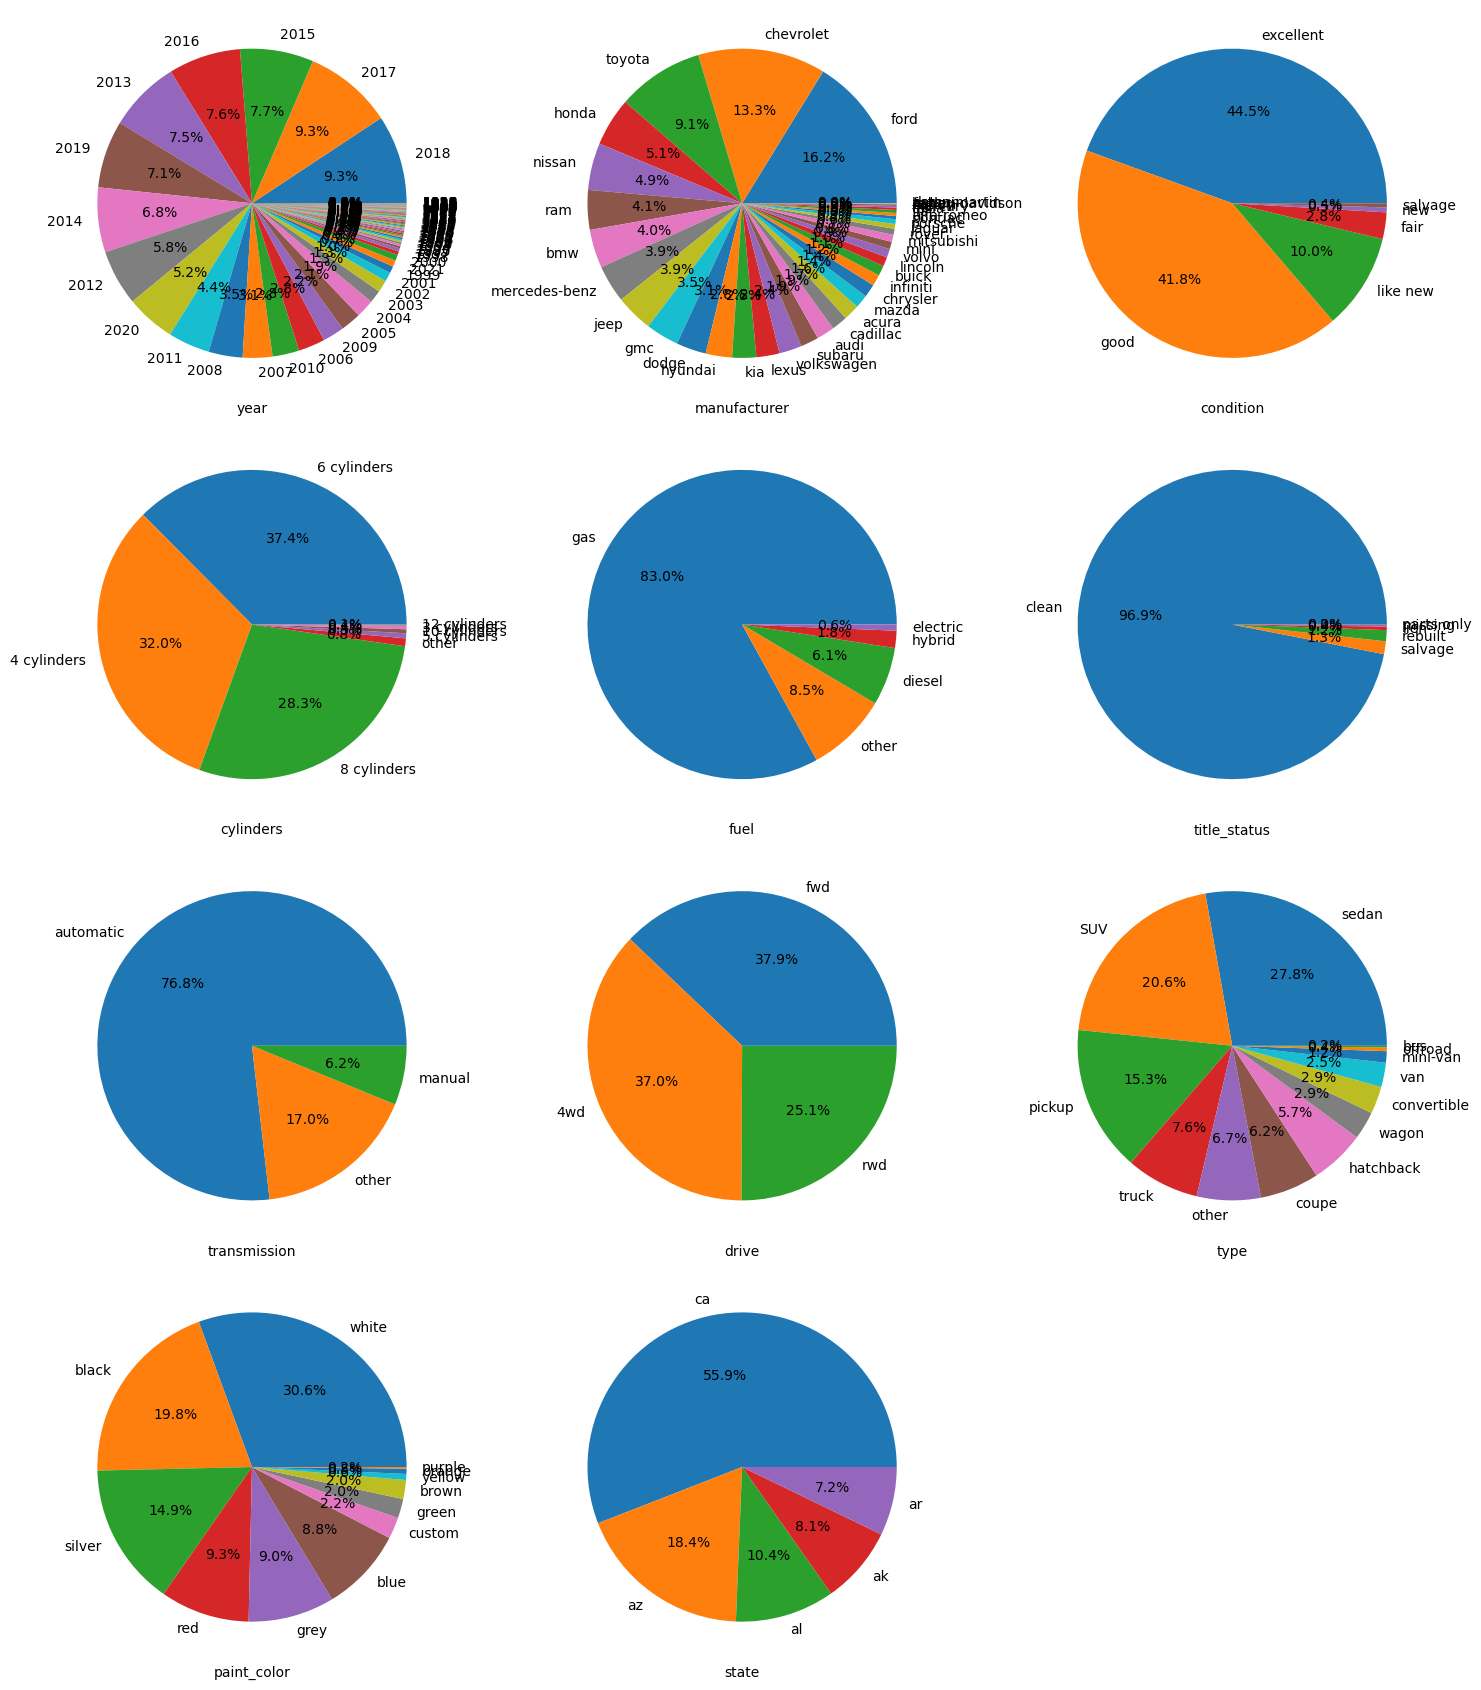

In [39]:
t=1
plt.figure(figsize=(15,17))
for i in cat_cols:
    plt.subplot(4,3,t)
    plt.pie(df_3[i].value_counts(), labels=df_3[i].value_counts().index, autopct='%1.1f%%')
    plt.xlabel(i)
    plt.xticks(rotation=45)
    t=t+1
plt.tight_layout()

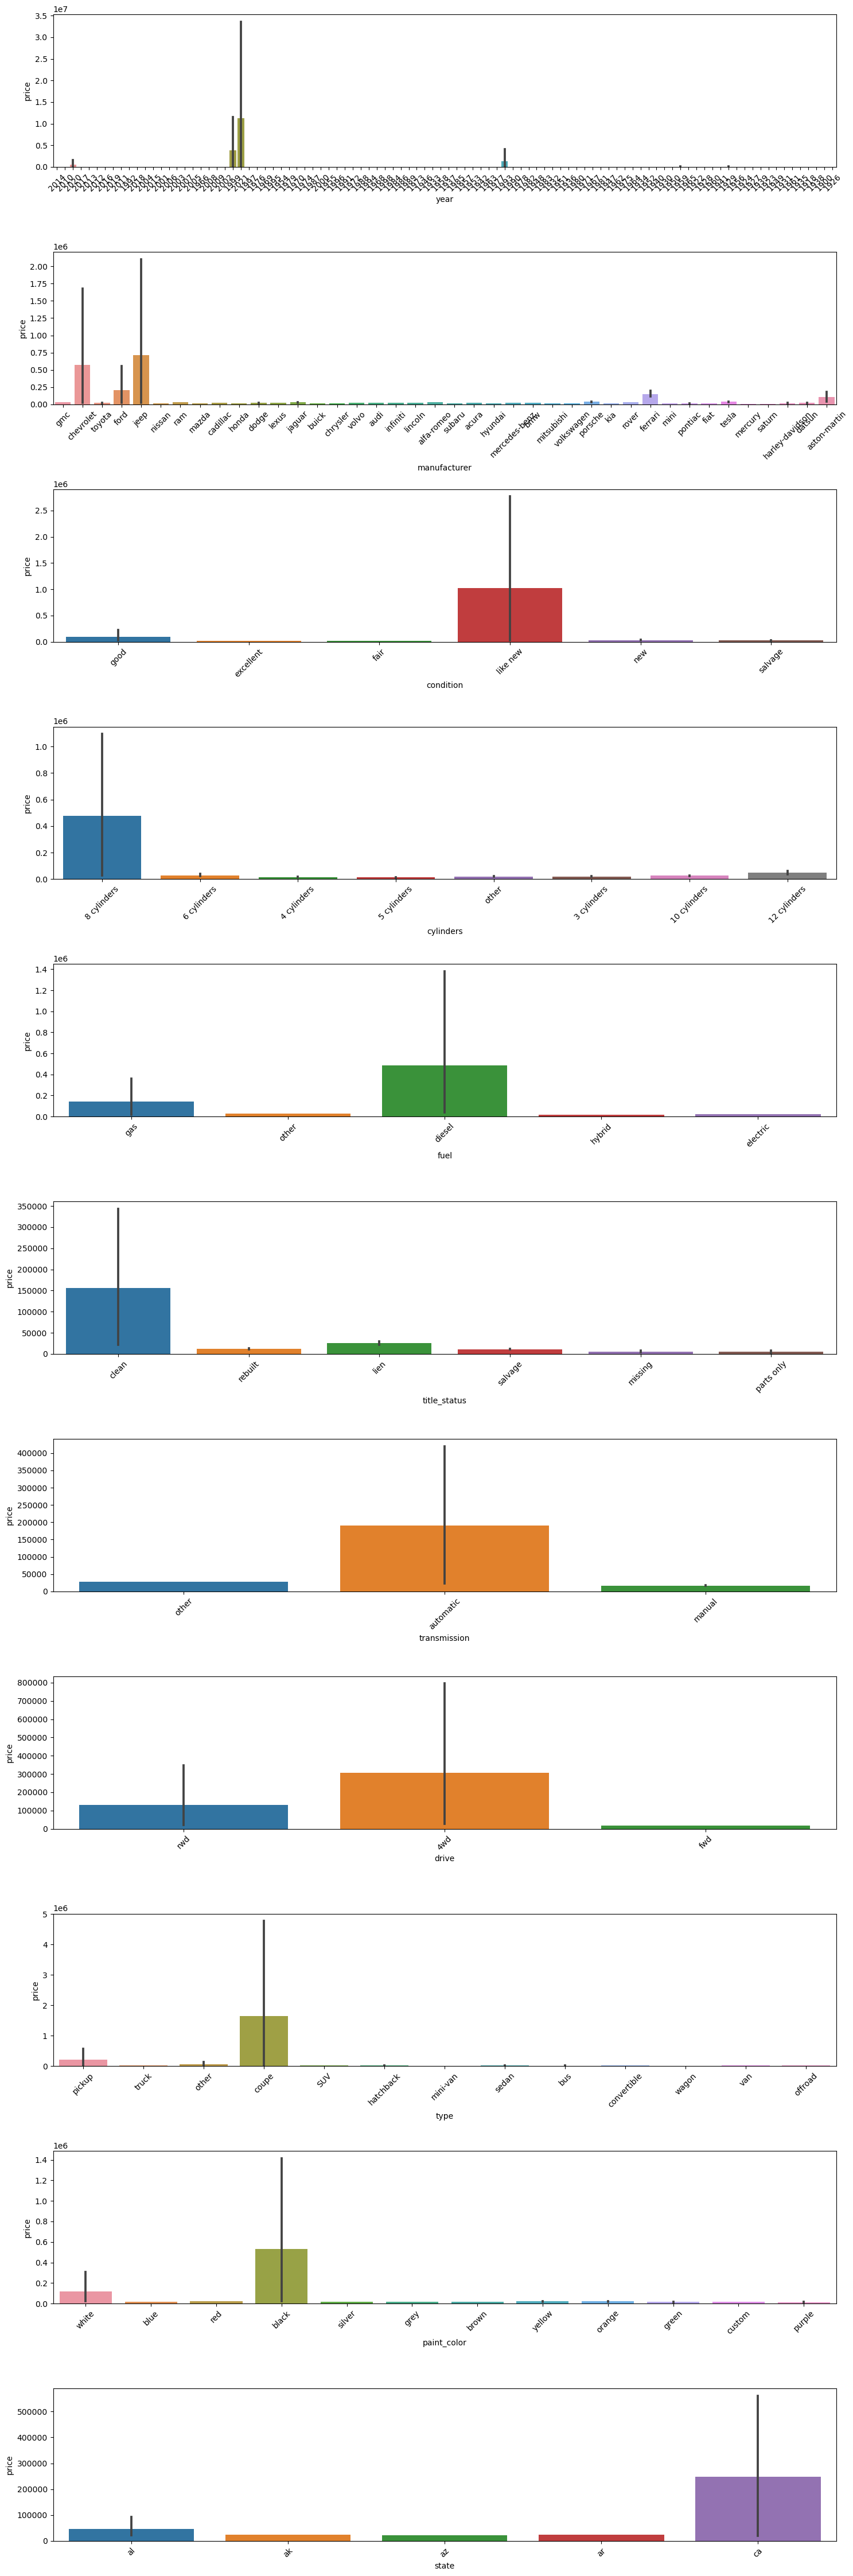

In [40]:
t=1
plt.figure(figsize=(15,45))
for i in cat_cols:
    plt.subplot(11,1,t)
    sns.barplot(x=i, y='price', data=df_3)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    t=t+1
plt.tight_layout()

<Axes: xlabel='odometer', ylabel='price'>

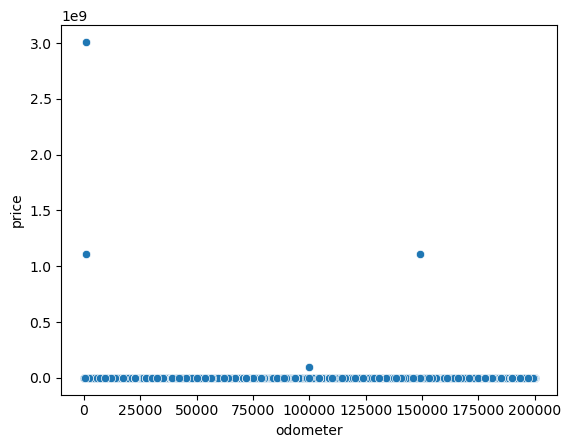

In [41]:
sns.scatterplot(x=df_3['odometer'], y=df_3['price'])

In [42]:
car_type = list(df_3['type'].unique())
car_type

['pickup',
 'truck',
 'other',
 'coupe',
 'SUV',
 'hatchback',
 'mini-van',
 'sedan',
 'bus',
 'convertible',
 'wagon',
 'van',
 'offroad']

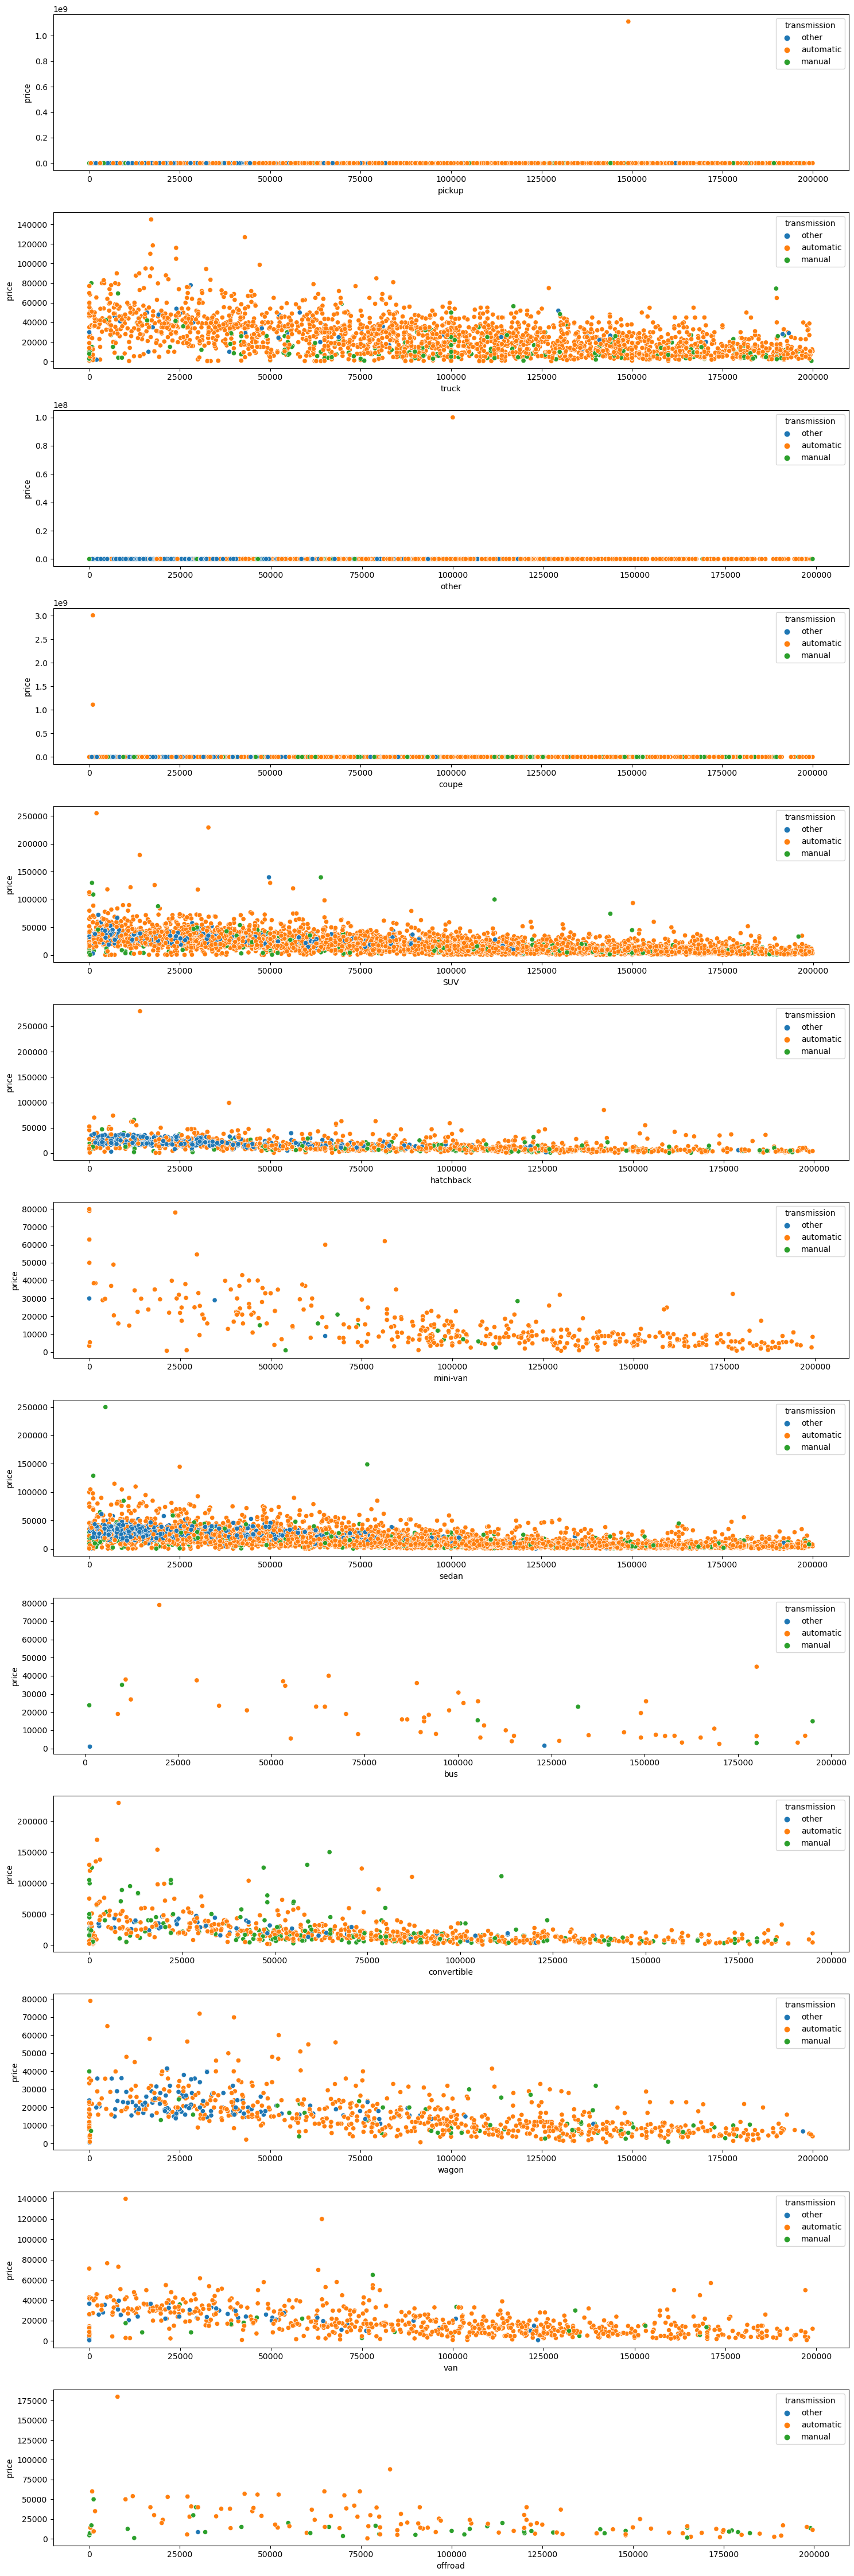

In [43]:
t=1
plt.figure(figsize=(15,45))
for i in car_type:
    plt.subplot(13,1,t)
    sns.scatterplot(x=df_3[df_3['type']==i]['odometer'], y=df_3[df_3['type']==i]['price'], hue=df_3['transmission'])
    plt.xlabel(i)
    t=t+1
plt.tight_layout()

In [44]:
car_condition = list(df_3['condition'].unique())
car_condition

['good', 'excellent', 'fair', 'like new', 'new', 'salvage']

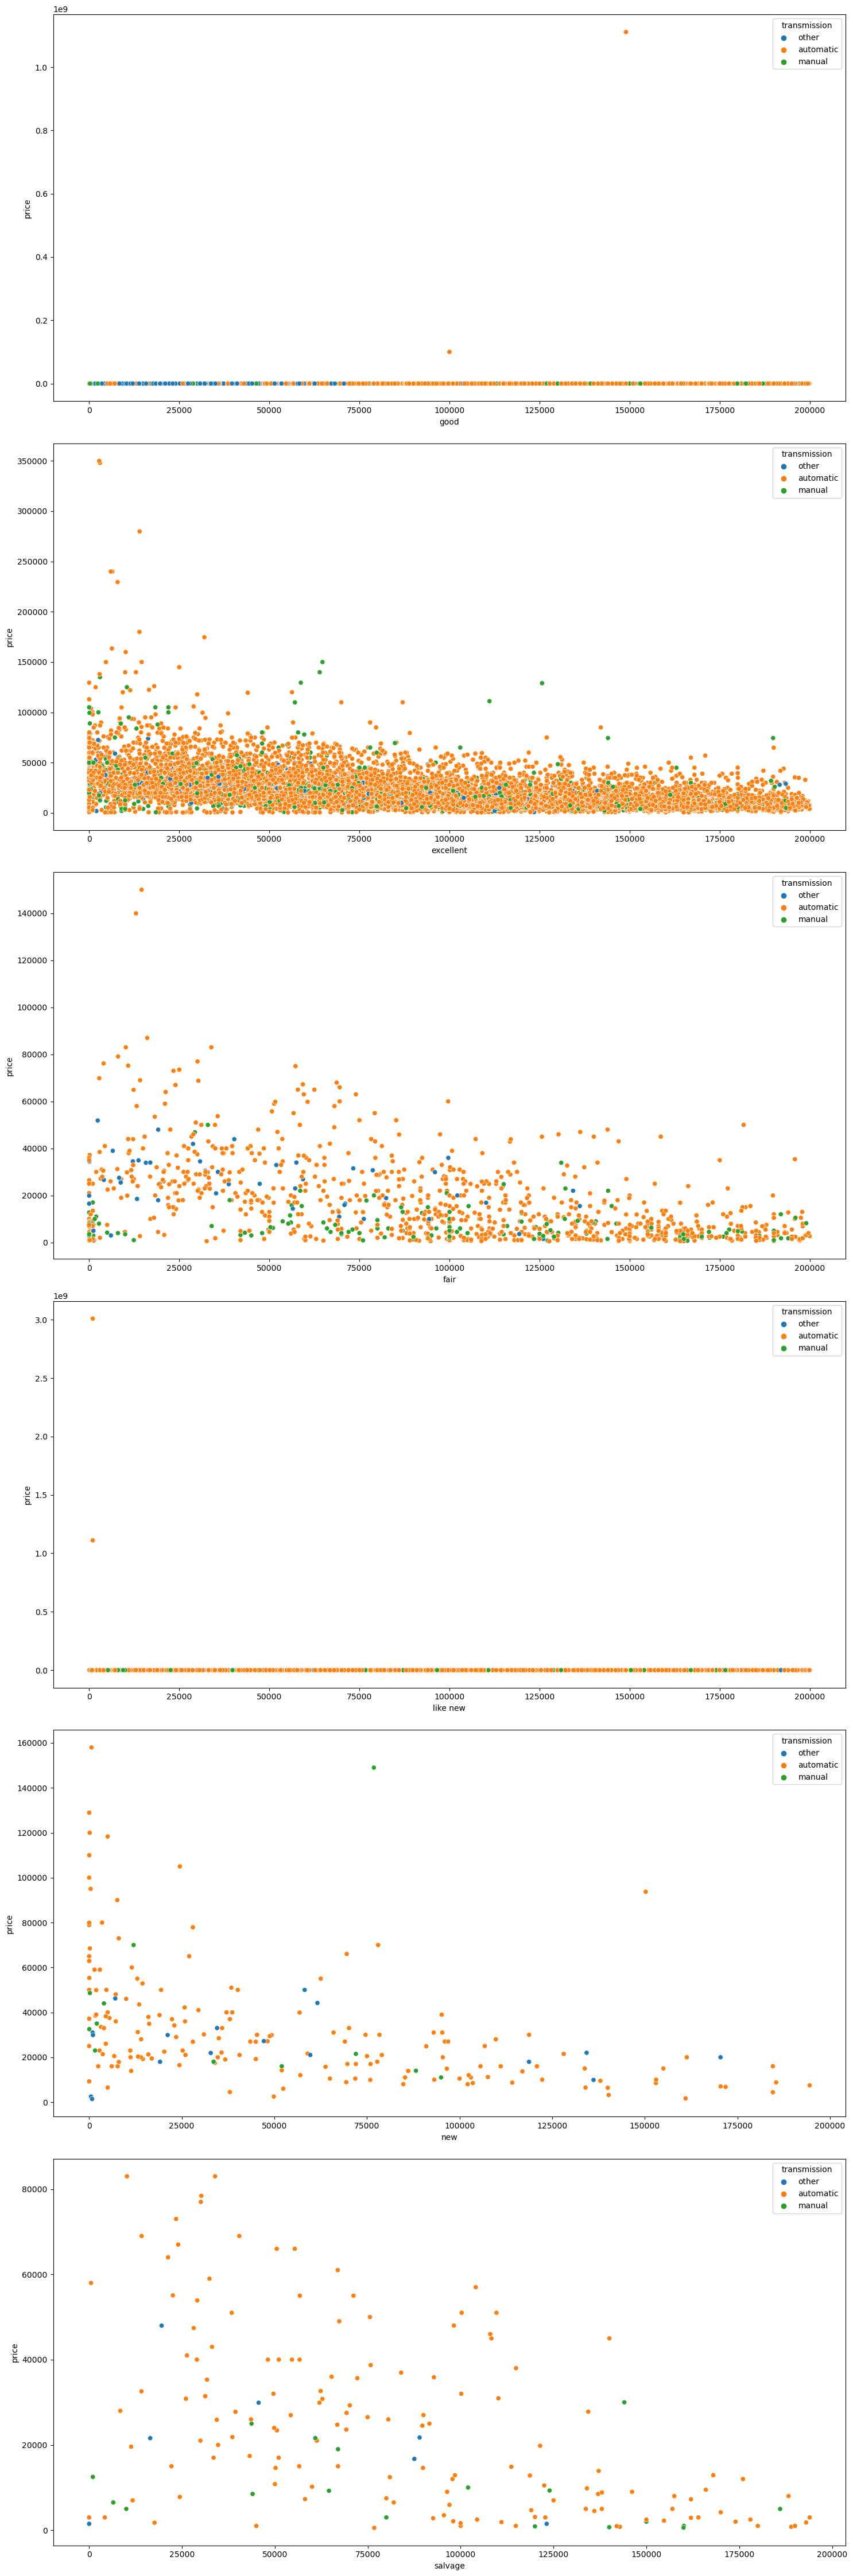

In [45]:
t=1
plt.figure(figsize=(15,45))
for i in car_condition:
    plt.subplot(6,1,t)
    sns.scatterplot(x=df_3[df_3['condition']==i]['odometer'], y=df_3[df_3['condition']==i]['price'], hue=df_3['transmission'])
    plt.xlabel(i)
    t=t+1
plt.tight_layout()

In [46]:
car_transmission = list(df_3['transmission'].unique())
car_transmission

['other', 'automatic', 'manual']

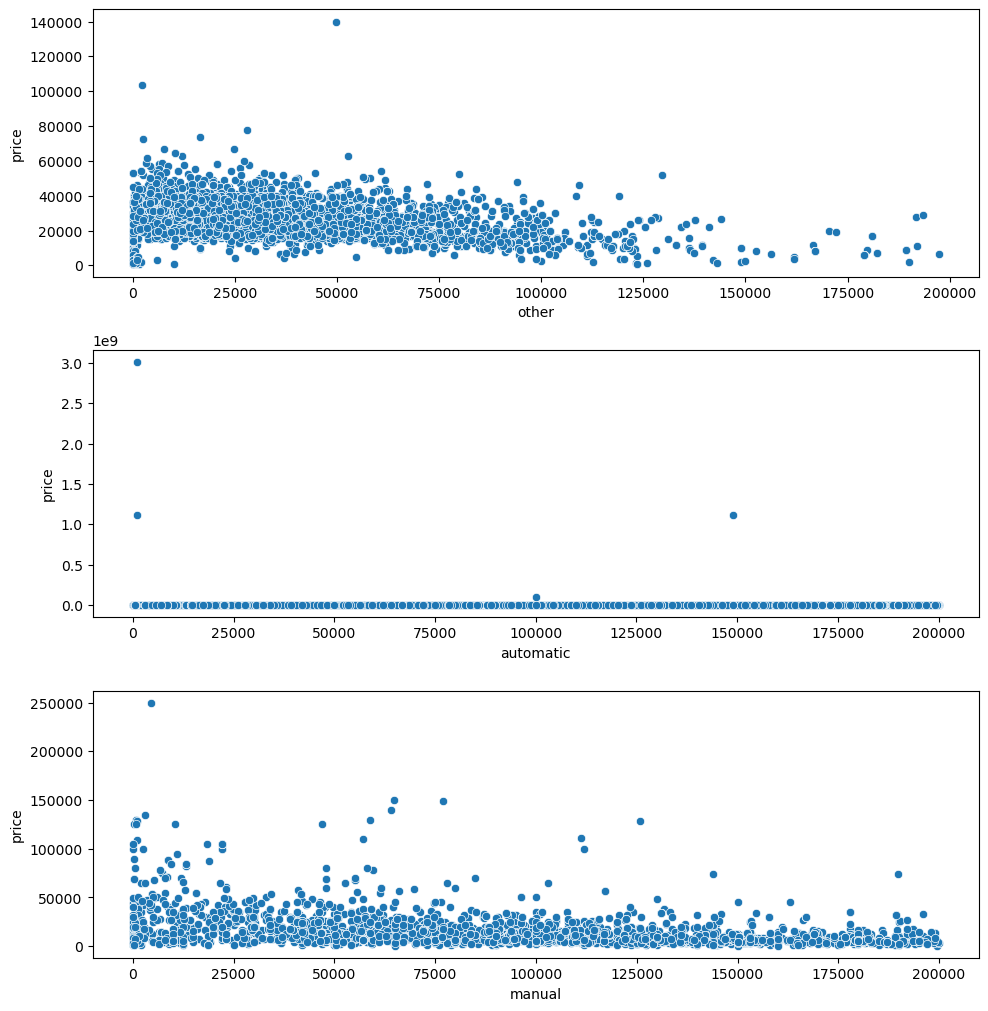

In [47]:
t=1
plt.figure(figsize=(10,20))
for i in car_transmission:
    plt.subplot(6,1,t)
    sns.scatterplot(x=df_3[df_3['transmission']==i]['odometer'], y=df_3[df_3['transmission']==i]['price'])
    plt.xlabel(i)
    t=t+1
plt.tight_layout()

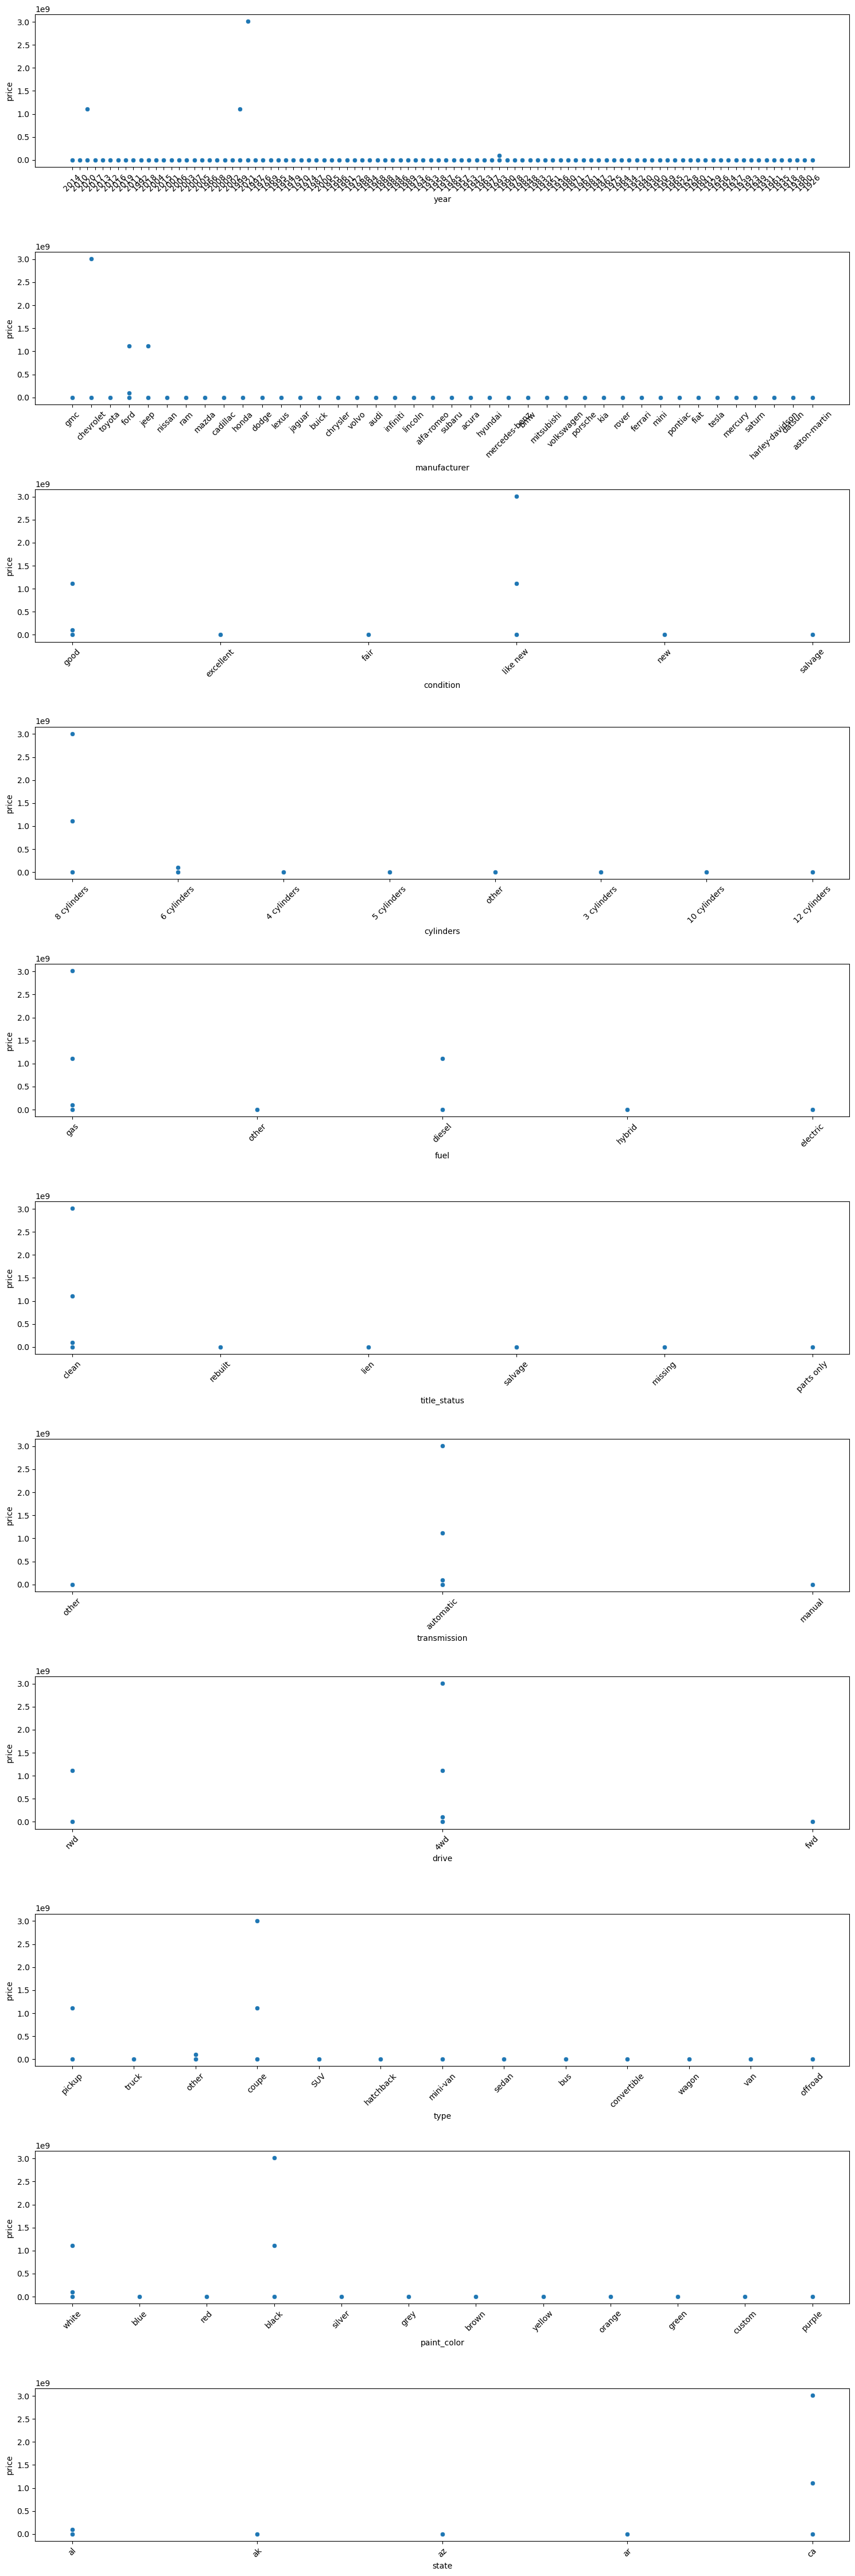

In [48]:
t=1
plt.figure(figsize=(15,45))
for i in cat_cols:
    plt.subplot(11,1,t)
    sns.scatterplot(x=i, y='price', data=df_3)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    t=t+1
plt.tight_layout()

* The above plot is basically to check if there is well seperation of prices accross any categories to identify appropriate encoding

<a id="Encoding" ></a>

### Encoding : 

In [49]:
cat_col_dict = {}
for i in cat_cols:
    cat_col_dict[i] = list(df_3[i].value_counts(normalize=True).index)

In [50]:
cat_col_dict

{'year': ['2018',
  '2017',
  '2015',
  '2016',
  '2013',
  '2019',
  '2014',
  '2012',
  '2020',
  '2011',
  '2008',
  '2007',
  '2010',
  '2006',
  '2009',
  '2005',
  '2004',
  '2003',
  '2002',
  '2001',
  '1999',
  '2021',
  '2000',
  '1998',
  '1997',
  '1995',
  '1996',
  '1994',
  '1993',
  '1966',
  '1989',
  '1968',
  '1991',
  '1969',
  '1990',
  '1970',
  '1992',
  '1986',
  '1972',
  '1967',
  '1979',
  '1985',
  '1987',
  '1963',
  '1965',
  '1973',
  '1984',
  '1980',
  '1974',
  '1988',
  '1971',
  '1978',
  '1955',
  '1964',
  '1981',
  '1977',
  '1956',
  '1976',
  '1975',
  '1957',
  '1951',
  '1982',
  '1960',
  '1948',
  '1962',
  '1940',
  '1950',
  '1983',
  '1959',
  '1946',
  '1958',
  '1952',
  '1939',
  '1961',
  '1932',
  '1954',
  '1953',
  '1936',
  '1934',
  '1930',
  '1928',
  '1947',
  '1933',
  '1927',
  '1941',
  '1929',
  '1937',
  '1942',
  '1923',
  '1935',
  '1949',
  '1931',
  '1938',
  '1924',
  '1922',
  '1918',
  '1900',
  '1926'],
 'manufactu

In [51]:
cat_cols

['year',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

In [52]:
year = {}
t=0
for i in cat_col_dict['year']:
    year[i]=t
    t=t+1

In [53]:
year

{'2018': 0,
 '2017': 1,
 '2015': 2,
 '2016': 3,
 '2013': 4,
 '2019': 5,
 '2014': 6,
 '2012': 7,
 '2020': 8,
 '2011': 9,
 '2008': 10,
 '2007': 11,
 '2010': 12,
 '2006': 13,
 '2009': 14,
 '2005': 15,
 '2004': 16,
 '2003': 17,
 '2002': 18,
 '2001': 19,
 '1999': 20,
 '2021': 21,
 '2000': 22,
 '1998': 23,
 '1997': 24,
 '1995': 25,
 '1996': 26,
 '1994': 27,
 '1993': 28,
 '1966': 29,
 '1989': 30,
 '1968': 31,
 '1991': 32,
 '1969': 33,
 '1990': 34,
 '1970': 35,
 '1992': 36,
 '1986': 37,
 '1972': 38,
 '1967': 39,
 '1979': 40,
 '1985': 41,
 '1987': 42,
 '1963': 43,
 '1965': 44,
 '1973': 45,
 '1984': 46,
 '1980': 47,
 '1974': 48,
 '1988': 49,
 '1971': 50,
 '1978': 51,
 '1955': 52,
 '1964': 53,
 '1981': 54,
 '1977': 55,
 '1956': 56,
 '1976': 57,
 '1975': 58,
 '1957': 59,
 '1951': 60,
 '1982': 61,
 '1960': 62,
 '1948': 63,
 '1962': 64,
 '1940': 65,
 '1950': 66,
 '1983': 67,
 '1959': 68,
 '1946': 69,
 '1958': 70,
 '1952': 71,
 '1939': 72,
 '1961': 73,
 '1932': 74,
 '1954': 75,
 '1953': 76,
 '1936': 

In [54]:
df_3['year_ec'] = df_3['year'].map(year)

In [55]:
manufacturer = {}
t=0
for i in cat_col_dict['manufacturer']:
    manufacturer[i]=t
    t=t+1
    
df_3['manufacturer_ec'] = df_3['manufacturer'].map(manufacturer)

In [56]:
condition = {}
t=0
for i in cat_col_dict['condition']:
    condition[i]=t
    t=t+1

df_3['condition_ec'] = df_3['condition'].map(condition)

In [57]:
cylinders = {}
t=0
for i in cat_col_dict['cylinders']:
    cylinders[i]=t
    t=t+1

df_3['cylinders_ec'] = df_3['cylinders'].map(cylinders)

In [58]:
fuel = {}
t=0
for i in cat_col_dict['fuel']:
    fuel[i]=t
    t=t+1

df_3['fuel_ec'] = df_3['fuel'].map(fuel)

In [59]:
title_status = {}
t=0
for i in cat_col_dict['title_status']:
    title_status[i]=t
    t=t+1

df_3['title_status_ec'] = df_3['title_status'].map(title_status)

In [60]:
transmission = {}
t=0
for i in cat_col_dict['transmission']:
    transmission[i]=t
    t=t+1

df_3['transmission_ec'] = df_3['transmission'].map(transmission)

In [61]:
drive = {}
t=0
for i in cat_col_dict['drive']:
    drive[i]=t
    t=t+1

df_3['drive_ec'] = df_3['drive'].map(drive)

In [62]:
type_1 = {}
t=0
for i in cat_col_dict['type']:
    type_1[i]=t
    t=t+1

df_3['type_ec'] = df_3['type'].map(type_1)

In [63]:
paint_color = {}
t=0
for i in cat_col_dict['paint_color']:
    paint_color[i]=t
    t=t+1

df_3['paint_color_ec'] = df_3['paint_color'].map(paint_color)

In [64]:
state = {}
t=0
for i in cat_col_dict['state']:
    state[i]=t
    t=t+1

df_3['state_ec'] = df_3['state'].map(state)

In [65]:
df_3.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date', 'year_ec', 'manufacturer_ec', 'condition_ec',
       'cylinders_ec', 'fuel_ec', 'title_status_ec', 'transmission_ec',
       'drive_ec', 'type_ec', 'paint_color_ec', 'state_ec'],
      dtype='object')

In [66]:
cat_cols

['year',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

In [67]:
df_4 = df_3.drop(['year',
 'manufacturer',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state', 'description', 'region', 'model', 'posting_date', 'lat', 'long'], axis=1)

In [68]:
df_4

price  odometer  year_ec  manufacturer_ec  condition_ec  \
0      33590.0   57923.0        6                9             1   
1      22590.0   71229.0       12                1             1   
2      39590.0   19160.0        8                1             1   
3      30990.0   41124.0        1                2             1   
4      15000.0  128000.0        4                0             0   
...        ...       ...      ...              ...           ...   
49339  20990.0   32381.0        1                3             0   
49340   9500.0  166000.0        2               15             5   
49341  15990.0   62029.0        1                4             0   
49342  16990.0   71945.0        7               16             0   
49344  18990.0   78378.0        4                6             0   

       cylinders_ec  fuel_ec  title_status_ec  transmission_ec  drive_ec  \
0                 2        0                0                1         2   
1                 2        0                0                1         2   
2                 2        0                0                1         2   
3                 2        0                0                1         2   
4                 0        0                0                0         2   
...             ...      ...              ...              ...       ...   
49339             1        0                0                0         1   
49340             1        0                1                0         1   
49341             1        0                0                0         1   
49342             0        0                0                0         1   
49344             0        0                0                0         1   

       type_ec  paint_color_ec  state_ec  
0            2               0         2  
1            2               5         2  
2            2               3         2  
3            2               3         2  
4            3               1         2  
...        ...             ...       ...  
49339        0               7         0  
49340        1               7         0  
49341        0               5         0  
49342        1               5         0  
49344        1               4         0  

[40921 rows x 13 columns]

<a id="OLS_Regression" ></a>

### OLS Regression (Base Model Build) :

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(df_4.drop('price', axis=1), df_4['price'], 
                                                train_size=0.7,
                                                random_state=1)

In [70]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((28644, 12), (12277, 12), (28644,), (12277,))

In [71]:
xtrain_c = add_constant(xtrain)
model = OLS(ytrain, xtrain_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9561
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.489
Time:                        08:21:15   Log-Likelihood:            -5.1881e+05
No. Observations:               28644   AIC:                         1.038e+06
Df Residuals:                   28631   BIC:                         1.038e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.523e+05   3.44e+05      1.025      0.305   -3.21e+05    1.03e+06
odometer           -4.2548      2.136     -1.992      0.046      -8.441      -0.069
year_ec          1.615e+04   1.13e+04      1.432      0.152   -5954.559    3.83e+04
manufacturer_ec  -1.07e+04   1.35e+04     -0.795      0.427   -3.71e+04    1.57e+04
condition_ec      1.83e+05   1.28e+05      1.433      0.152   -6.73e+04    4.33e+05
cylinders_ec     8.656e+04    1.1e+05      0.789      0.430   -1.29e+05    3.02e+05
fuel_ec         -7.498e+04   1.49e+05     -0.504      0.614   -3.66e+05    2.16e+05
title_status_ec -1.024e+05   3.02e+05     -0.339      0.735   -6.94e+05    4.89e+05
transmission_ec -2.122e+05   1.92e+05     -1.106      0.269   -5.88e+05    1.64e+05
drive_ec        -2.776e+04   1.37e+05     -0.203      0.839   -2.96e+05     2.4e+05
type_ec          3.216e+04   3.98e+04      0.808      0.419   -4.59e+04     1.1e+05
paint_color_ec  -2.812e+04   4.76e+04     -0.591      0.555   -1.21e+05    6.52e+04
state_ec        -7.541e+04   8.37e+04     -0.901      0.367   -2.39e+05    8.86e+04
==============================================================================
Omnibus:                   133525.977   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     977495430882.761
Skew:                         169.137   Prob(JB):                         0.00
Kurtosis:                   28619.454   Cond. No.                     3.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
xtest_c = add_constant(xtest)

In [73]:
ytrain_pred = model.predict(xtrain_c)
ytest_pred = model.predict(xtest_c)

In [74]:
mse(ytrain, ytrain_pred, squared=False), mse(ytest, ytest_pred, squared=False)

(17778168.947148096, 14206586.390114639)

In [75]:
mape(ytrain, ytrain_pred), mape(ytest, ytest_pred)

(26.781708924361528, 27.212809229462952)

In [76]:
vif_df = pd.DataFrame()
vif_df['att'] = xtrain.columns
vif_df['vif'] = [variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
vif_df.sort_values(by='vif', ascending =False, ignore_index=True, inplace=True)

while vif_df['vif'][0]>10:
    xtrain.drop(vif_df['att'][0], axis=1, inplace=True)
    vif_df = pd.DataFrame()
    vif_df['att']=xtrain.columns
    vif_df['vif']=[variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
    vif_df.sort_values(by = 'vif', ascending = False, inplace=True, ignore_index=True)

In [77]:
xtrain

odometer  year_ec  manufacturer_ec  condition_ec  cylinders_ec  \
3082   105766.0        7                6             1             0   
14763   62371.0       17               22             0             0   
17368   11751.0        8                2             0             0   
45319   79272.0        1                1             0             1   
4189    72719.0        3                8             1             1   
...         ...      ...              ...           ...           ...   
8648   151945.0       13                2             1             1   
39301   38760.0        0                7             3             1   
5884    87132.0        2                1             2             2   
13654   25800.0        1                4             2             1   
39870  100000.0        6                5             1             2   

       fuel_ec  title_status_ec  transmission_ec  drive_ec  type_ec  \
3082         0                0                1         2        0   
14763        0                0                0         0        0   
17368        0                0                0         1        2   
45319        0                0                0         1        0   
4189         0                0                0         1        1   
...        ...              ...              ...       ...      ...   
8648         0                0                0         0        4   
39301        0                0                1         1        1   
5884         0                0                0         1        3   
13654        0                3                2         0        1   
39870        0                0                0         1        3   

       paint_color_ec  state_ec  
3082                4         2  
14763               4         1  
17368               2         4  
45319               0         0  
4189                4         2  
...               ...       ...  
8648                4         1  
39301               1         0  
5884                1         3  
13654               0         1  
39870               1         0  

[28644 rows x 12 columns]

In [78]:
xtrain_c = add_constant(xtrain.drop('condition_ec', axis=1))
model = OLS(ytrain, xtrain_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8563
Date:                Tue, 07 May 2024   Prob (F-statistic):              0.583
Time:                        08:21:16   Log-Likelihood:            -5.1881e+05
No. Observations:               28644   AIC:                         1.038e+06
Df Residuals:                   28632   BIC:                         1.038e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.84e+05   3.31e+05      1.461      0.144   -1.65e+05    1.13e+06
odometer           -4.5133      2.128     -2.121      0.034      -8.685      -0.342
year_ec          1.707e+04   1.13e+04      1.516      0.130   -5000.546    3.91e+04
manufacturer_ec -1.075e+04   1.35e+04     -0.799      0.424   -3.71e+04    1.56e+04
cylinders_ec     8.771e+04    1.1e+05      0.799      0.424   -1.27e+05    3.03e+05
fuel_ec         -7.051e+04   1.49e+05     -0.474      0.635   -3.62e+05    2.21e+05
title_status_ec -7.128e+04   3.01e+05     -0.237      0.813   -6.61e+05    5.19e+05
transmission_ec  -1.95e+05   1.92e+05     -1.018      0.309   -5.71e+05     1.8e+05
drive_ec        -3.232e+04   1.37e+05     -0.236      0.813      -3e+05    2.36e+05
type_ec          3.251e+04   3.98e+04      0.817      0.414   -4.55e+04    1.11e+05
paint_color_ec  -2.805e+04   4.76e+04     -0.589      0.556   -1.21e+05    6.52e+04
state_ec        -6.258e+04   8.32e+04     -0.752      0.452   -2.26e+05       1e+05
==============================================================================
Omnibus:                   133530.169   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     977775621409.142
Skew:                         169.155   Prob(JB):                         0.00
Kurtosis:                   28623.555   Cond. No.                     3.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
df_4.head()

price  odometer  year_ec  manufacturer_ec  condition_ec  cylinders_ec  \
0  33590.0   57923.0        6                9             1             2   
1  22590.0   71229.0       12                1             1             2   
2  39590.0   19160.0        8                1             1             2   
3  30990.0   41124.0        1                2             1             2   
4  15000.0  128000.0        4                0             0             0   

   fuel_ec  title_status_ec  transmission_ec  drive_ec  type_ec  \
0        0                0                1         2        2   
1        0                0                1         2        2   
2        0                0                1         2        2   
3        0                0                1         2        2   
4        0                0                0         2        3   

   paint_color_ec  state_ec  
0               0         2  
1               5         2  
2               3         2  
3               3         2  
4               1         2

In [80]:
q1 = df_4.quantile(0.25)
q3 = df_4.quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr
df_5 = df_4[~((df_4<ll)|(df_4>ul)).any(axis=1)]
df_5.head()

price  odometer  year_ec  manufacturer_ec  condition_ec  cylinders_ec  \
4   15000.0  128000.0        4                0             0             0   
7   35000.0   43000.0        5                2             0             0   
32  14000.0   95000.0        7                3             0             0   
44  26990.0   63129.0        6                1             1             0   
59   3000.0  176144.0       16               20             1             0   

    fuel_ec  title_status_ec  transmission_ec  drive_ec  type_ec  \
4         0                0                0         2        3   
7         0                0                0         1        3   
32        0                0                0         0       10   
44        0                0                0         1        2   
59        0                0                0         0       10   

    paint_color_ec  state_ec  
4                1         2  
7                4         2  
32               2         2  
44               1         2  
59               2         2

In [81]:
xtrain, xtest, ytrain, ytest = train_test_split(df_5.drop('price', axis=1), df_5['price'], 
                                                train_size=0.7,
                                                random_state=1)

In [82]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((16192, 12), (6940, 12), (16192,), (6940,))

In [83]:
xtrain_c = add_constant(xtrain)
model = OLS(ytrain, xtrain_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     1538.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        08:21:16   Log-Likelihood:            -1.6969e+05
No. Observations:               16192   AIC:                         3.394e+05
Df Residuals:                   16182   BIC:                         3.395e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.881e+04    226.972    126.943      0.000    2.84e+04    2.93e+04
odometer           -0.1091      0.002    -71.676      0.000      -0.112      -0.106
year_ec          -526.6240     13.862    -37.991      0.000    -553.794    -499.454
manufacturer_ec  -152.4944      9.800    -15.561      0.000    -171.703    -133.286
condition_ec      384.1553     97.986      3.921      0.000     192.093     576.218
cylinders_ec      813.6771     78.387     10.380      0.000     660.030     967.325
fuel_ec          3.594e-12   3.63e-14     98.946      0.000    3.52e-12    3.67e-12
title_status_ec  2.671e-12   3.15e-14     84.654      0.000    2.61e-12    2.73e-12
transmission_ec  6.211e-13   7.39e-15     84.019      0.000    6.07e-13    6.36e-13
drive_ec         2896.2851     88.291     32.804      0.000    2723.226    3069.345
type_ec           130.9637     25.515      5.133      0.000      80.951     180.977
paint_color_ec   -300.8273     31.639     -9.508      0.000    -362.843    -238.812
state_ec          897.3239     54.072     16.595      0.000     791.336    1003.312
==============================================================================
Omnibus:                     1751.648   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3032.699
Skew:                           0.749   Prob(JB):                         0.00
Kurtosis:                       4.501   Cond. No.                     5.77e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.29e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=25, random_state=1)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, min_samples_split=25,
                      random_state=1)

In [85]:
ypred = dt.predict(xtrain)

In [86]:
ypred_test = dt.predict(xtest)

In [87]:
mse(ytrain, ypred, squared=False), mse(ytest, ypred_test, squared=False)

(6704.886905401776, 7200.648293236599)

In [88]:
mape(ytrain, ypred), mape(ytest, ypred_test)

(0.5058072780691668, 0.5323671937749133)

In [89]:
r2_score(ytrain, ypred), r2_score(ytest, ypred_test)

(0.673158662196067, 0.624448788646446)

In [90]:
def model_validation(model, xtr, xte, ytr, yte):
    global m
    m = model
    m.fit(xtr, ytr)
    y_pred = m.predict(xtr)
    print('Training MSE: ', mse(ytr, y_pred, squared=False))
    print('Traning MAPE:', mape(ytr, y_pred))
    print('Training R2:', r2_score(ytr, y_pred))
    
    print('\n\n')
    
    y_pred_test = m.predict(xte)
    print('Training MSE: ', mse(yte, y_pred_test, squared=False))
    print('Traning MAPE:', mape(yte, y_pred_test))
    print('Training R2:', r2_score(yte, y_pred_test))

In [91]:
ada = AdaBoostRegressor(n_estimators=100, 
                        learning_rate=0.5, 
                        loss='square', 
                        random_state=1, 
                        base_estimator='deprecated',)

In [92]:
model_validation(AdaBoostRegressor(), xtrain, xtest, ytrain, ytest)

Training MSE:  8424.7876221366
Traning MAPE: 0.8295980788236198
Training R2: 0.4839735186504086



Training MSE:  8461.15932823846
Traning MAPE: 0.8068341041878976
Training R2: 0.48145587795223044


In [93]:
model_validation(ada, xtrain, xtest, ytrain, ytest)

Training MSE:  13298.35519596106
Traning MAPE: 1.5598168168902713
Training R2: -0.28573043158683054



Training MSE:  13320.567549898577
Traning MAPE: 1.5359305477533018
Training R2: -0.28520210406714375


In [95]:
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.1, random_state =1)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [96]:
model_validation(xgb, xtrain, xtest, ytrain, ytest)

Training MSE:  5671.792349107718
Traning MAPE: 0.43893751285399724
Training R2: 0.7661191245732373



Training MSE:  6018.744920858425
Traning MAPE: 0.4561832916024934
Training R2: 0.7376156998235397


In [97]:
ypred = xgb.predict(xtrain)

In [98]:
ypred_test = xgb.predict(xtest)

In [99]:
mse(ytrain, ypred, squared=False), mse(ytest, ypred_test, squared=False)

(5671.792349107718, 6018.744920858425)

In [100]:
mape(ytrain, ypred), mape(ytest, ypred_test)

(0.43893751285399724, 0.4561832916024934)

In [101]:
r2_score(ytrain, ypred), r2_score(ytest, ypred_test)

(0.7661191245732373, 0.7376156998235397)

In [102]:
param = {'n_estimators': [100,125,150], 'max_depth':[6,7,8], 'learning_rate': [0.1, 0.05, 0.01]}

In [103]:
gscv = GridSearchCV(XGBRegressor(), param_grid=param, scoring = 'r2', cv=5)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...nehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [100, 125, 150]},
             scoring='r2')

In [104]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}

In [105]:
gscv.best_score_

0.7667088189037384

In [106]:
xgb = XGBRegressor(**gscv.best_params_)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [107]:
ypred = xgb.predict(xtrain)

In [108]:
ypred_test = xgb.predict(xtest)

In [109]:
mse(ytrain, ypred, squared=False), mse(ytest, ypred_test, squared=False)

(3572.143431866198, 5464.956032124593)

In [110]:
mape(ytrain, ypred), mape(ytest, ypred_test)

(0.2658852775428675, 0.4014950066883338)

In [111]:
r2_score(ytrain, ypred), r2_score(ytest, ypred_test)

(0.9072290842976101, 0.783678685223752)

In [112]:
xgb.feature_importances_

array([0.18293142, 0.17006299, 0.07371991, 0.02252265, 0.11982181,
       0.        , 0.        , 0.        , 0.28371492, 0.07578143,
       0.03058165, 0.04086323], dtype=float32)

In [113]:
xgb.feature_names_in_

array(['odometer', 'year_ec', 'manufacturer_ec', 'condition_ec',
       'cylinders_ec', 'fuel_ec', 'title_status_ec', 'transmission_ec',
       'drive_ec', 'type_ec', 'paint_color_ec', 'state_ec'], dtype='<U15')

In [114]:
df_3['description']

0        Carvana is the safer way to buy a car During t...
1        Carvana is the safer way to buy a car During t...
2        Carvana is the safer way to buy a car During t...
3        Carvana is the safer way to buy a car During t...
4        2013 F-150 XLT V6 4 Door. Good condition. Leve...
                               ...                        
49339    2017 Honda Accord Sport SE Sedan 32,381 $355/m...
49340           nice car AWD sunroof power window AC works
49341    2017 Nissan Altima 2.5 SV Sedan 62,029 $255/mo...
49342    2012 Audi Q5 3.2L Premium Plus SUV 71,945 $272...
49344    2013 BMW X5 xDrive35i Premium xDrive35i Premiu...
Name: description, Length: 40921, dtype: object

In [115]:
df_test = df_3.copy()

In [116]:
df_test['description'][0]

"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000909557📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7171237-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minut

In [117]:
df_test['description'][1]

"Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. Vehicle Stock# 2000977114📱 Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/7163375-74502 and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minut

In [118]:
df_test['description'] = df_test['description'].str.replace("Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. ", "")

In [119]:
df_test['description'] = df_test['description'].str.replace("Carvana is the safer way to buy a car During these uncertain times, Carvana is dedicated to ensuring safety for all of our customers. In addition to our 100% online shopping and selling experience that allows all customers to buy and trade their cars without ever leaving the safety of their house, we’re providing touchless delivery that make all aspects of our process even safer. Now, you can get the car you want, and trade in your old one, while avoiding person-to-person contact with our friendly advocates. There are some things that can’t be put off. And if buying a car is one of them, know that we’re doing everything we can to keep you keep moving while continuing to put your health safety, and happiness first. ", "")
df_test['description'] = df_test['description'].str.replace("Want to instantly check this car’s availability? Call us at  334-758-9176Just text that stock number to 855-976-4304 or head to http://www.carvanaauto.com/", "")
df_test['description'] = df_test['description'].str.replace(" and plug it into the search bar!Get PRE-QUALIFIED for your auto loan in 2 minutes - no hit to your credit:http://finance.carvanaauto.com/", "")
df_test['description'] = df_test['description'].str.replace("Looking for more cars like this one?", "")
df_test['description'] = df_test['description'].str.replace("Why buy with Carvana? We have one standard: the highest. Take a look at just some of the qualifications all of our cars must meet before we list them.150-POINT INSPECTION: We put each vehicle through a 150-point inspection so that you can be 100% confident in its quality and safety. See everything that goes into our inspections at:http://www.carvanaauto.com/", "")
df_test['description'] = df_test['description'].str.replace("Every Carvana car comes with a 7-day money-back guarantee. Why? It takes more than 15-minutes to make a decision on your next car. Learn more about test owning at http://about.carvanaauto.comFLEXIBLE FINANCING, TRADE INS WELCOME: We’re all about real-time financing without the middle man. Need financing? Pick a combination of down and monthly payments that work for you. Have a trade-in? We’ll give you a value in 2 minutes. Check out everything about our financing at:http://finance.carvanaauto.com/", "")
df_test['description'] = df_test['description'].str.replace("SAVINGS: Carvana's business model has fewer expenses and no bloated fees compared to your local dealership. See how much we can save you at http://about.carvanaauto.comPREMIUM DETAIL: We go the extra mile so that your car is looking as good as new. There are a lot of specifics that we won’t list here (we wash, clean, buff, paint, polish, wax, seal), but trust us that when your car arrives, it’s going to look sweet.Vehicle Info for ", "")
df_test['description'] = df_test['description'].str.replace("Disclosure: Price excludes tax, title, and registration (which we handle for you).Disclaimer: You agree that by providing your phone number, Carvana, or Carvana’s authorized representatives*, may call and/or send text messages (including by using equipment to automatically dial telephone numbers) about your interest in a purchase, for marketing/sales purposes, or for any other servicing or informational purpose related to your account. You do not have to consent to receiving calls or texts to purchase from Carvana. While every reasonable effort is made to ensure the accuracy of the information for this", "")
df_test['description'] = df_test['description'].str.replace("While every reasonable effort is made to ensure the accuracy of the information for this Chevrolet Silverado 1500 Extended Cab, we are not responsible for any errors or omissions contained in this ad. Please verify any information in question with Carvana at 334-758-9176*Including, but not limited to, Bridgecrest Credit Company, GO Financial and SilverRock Automotive", "")
df_test['description'] = df_test['description'].str.replace("2022  2021  2020  2019  2018  2017  2016  2015  2014  2013  2012  2011  2010  2009  2008  2007  2006  2005  2004  2003  2002  2001  2000   22  21    19  18  17  16  15  14  13  12  11  10  09  08  07  06  05  04  03  02  01  00", "")
df_test['description'] = df_test['description'].str.replace("we are not responsible for any errors or omissions contained in this ad. Please verify any information in question with Carvana at 334-758-9176*Including, but not limited to, Bridgecrest Credit Company, GO Financial and SilverRock Automotive", "")

In [120]:
df_test['description'][2]

'Vehicle Stock# 2000948059📱 6965441-745026965441-74502 We have 144 Chevrolet Silverado 1500 Crew Cab in stock for as low as $20990!6965441-74502NO REPORTED ACCIDENTS: We do not sell cars that have been in a reported accident or have a frame or structural damage.7 DAY TEST OWN MONEY BACK GUARANTEE: 6965441-74502COST Stock# 2000948059Trim: LT Pickup 4D 5 3/4 ft pickupMileage: 19k milesExterior Color: RedInterior Color: BLACKEngine: EcoTec3 5.3L V8 355hp 383ft. lbs.Drive: Two Wheel DriveTransmission: VIN: 3GCPWCED5LG130317Dealer  Chevrolet Silverado 1500 Crew Cab, .*Chevrolet* *Silverado* *1500* *Crew* *Cab* *Chevy* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *HD* *Crew* *Cab* *LS* *Pickup* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *LS* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *LT* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *LTZ* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *LT1* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *Crew* *Cab* *Chevrolet* *Silverado* *1500* *Crew* *Cab* *Xtr

In [121]:
df_test.reset_index(inplace=True)

In [122]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_score=[]

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    # The compound score ranges from -1 (most negative) to 1 (most positive)
    return scores['compound']

# Get sentiment score for the trimmed text
for i in range(len(df_test)):
    if pd.notnull(df_test['description'][i]):
        senti_score.append(get_sentiment_score(df_test.description[i]))
    else:
        # If description is null, append a neutral score
        senti_score.append(0.0)

df_test['Senti Score'] = senti_score

In [123]:
df_test['Senti Score']

0       -0.6996
1       -0.6996
2       -0.6996
3       -0.6996
4        0.4404
          ...  
40916    0.9898
40917    0.4215
40918    0.9570
40919    0.9889
40920    0.9881
Name: Senti Score, Length: 40921, dtype: float64

In [124]:
df_6 = df_5.copy()

In [125]:
df_6['Dec_sen_score'] = df_test['Senti Score']

In [126]:
xtrain, xtest, ytrain, ytest = train_test_split(df_6.drop('price', axis=1), df_6['price'], 
                                                train_size=0.7,
                                                random_state=1)

In [127]:
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate = 0.1)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [128]:
ypred = xgb.predict(xtrain)
ypred_test = xgb.predict(xtest)
mse(ytrain, ypred, squared=False), mse(ytest, ypred_test, squared=False)

(5680.2968546817965, 6108.069678032394)

In [129]:
mape(ytrain, ypred), mape(ytest, ypred_test)

(0.4369526787817207, 0.46142857477543436)

In [130]:
r2_score(ytrain, ypred), r2_score(ytest, ypred_test)

(0.7654172186115908, 0.7297697676109005)

In [131]:
param = {'n_estimators': [100,125,150], 'max_depth':[6,7,8], 'learning_rate': [0.1, 0.05, 0.01]}

In [132]:
gscv = GridSearchCV(XGBRegressor(), param_grid=param, scoring = 'r2', cv=5)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...nehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [6, 7, 8],
                         'n_estimators': [100, 125, 150]},
             scoring='r2')

In [133]:
gscv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}

In [134]:
gscv.best_score_

0.7572864783954552

In [135]:
xgb = XGBRegressor(**gscv.best_params_)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [136]:
ypred = xgb.predict(xtrain)

In [137]:
ypred_test = xgb.predict(xtest)

In [138]:
mse(ytrain, ypred, squared=False), mse(ytest, ypred_test, squared=False)

(3519.7184894429815, 5649.65749413231)

In [139]:
mape(ytrain, ypred), mape(ytest, ypred_test)

(0.25885435046311667, 0.4158106144823384)

In [140]:
r2_score(ytrain, ypred), r2_score(ytest, ypred_test)

(0.9099321232197428, 0.7688093802621636)

In [141]:
xgb.feature_importances_

array([0.18252932, 0.16800582, 0.06405988, 0.02191173, 0.11587863,
       0.        , 0.        , 0.        , 0.2830045 , 0.07213025,
       0.0281735 , 0.03887191, 0.02543443], dtype=float32)

In [142]:
xgb.feature_names_in_

array(['odometer', 'year_ec', 'manufacturer_ec', 'condition_ec',
       'cylinders_ec', 'fuel_ec', 'title_status_ec', 'transmission_ec',
       'drive_ec', 'type_ec', 'paint_color_ec', 'state_ec',
       'Dec_sen_score'], dtype='<U15')